In [1]:


import matplotlib.pyplot as plt

from chord import Chord
# load 
import sys
import time

from sklearn.model_selection import cross_val_score,train_test_split
from datetime import date
import numpy as np
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pingouin as pg
import subprocess
import os 
from scipy.stats import ranksums
from scipy.stats import pearsonr
from scipy import stats
import seaborn as sns
from scipy.stats import mannwhitneyu
if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
    
os.chdir(main_fold_path)


from utils.fnirs_utils import get_nine_region_data

    
DATA =  np.load('allData/prognosis_mix_hb/pretreatment_response/hb_data.npy')
LABEL =  np.load('allData/prognosis_mix_hb/pretreatment_response/label.npy')
data = DATA
label = LABEL
data = get_nine_region_data(data)

x = np.load('allData/prognosis_mix_hb/pretreatment_response/label_hamd.npy')
reduced_percentage = (x[:, 1] - x[:, 0]) / x[:, 0]

HbO = np.transpose(data[...,0::2],(0,2,1))
# HbO = individual_normalization(HbO)
print(f'HbO: {HbO.shape}')
HbR = np.transpose(data[...,1::2],(0,2,1))
HbT = HbO + HbR



Current system is Ubuntu
9
[array([ 8,  9, 19, 20]), array([ 0,  1, 10, 11]), array([ 6,  7, 16, 17, 18, 27, 28]), array([ 2,  3, 12, 13, 14, 23, 24]), array([29, 30, 40, 41, 50, 51]), array([21, 22, 31, 32, 42, 43]), array([38, 39, 48, 49]), array([33, 34, 44, 45]), array([ 4,  5, 15, 25, 26, 35, 36, 37, 46, 47])]
HbO: (64, 1250, 9)


output_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regions
output_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/five_regionsoutput_fold_final FigureTable/reg

/tmp/ipykernel_1671082/2367234938.py:175: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(3, 3, figsize=(15, 15))


output_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regionsoutput_fold_final FigureTable/regression/all/HAMD_change/nine_regions
output_fold_final FigureTable/regression/all/Responders/nine_regionsoutput_fold_final FigureTable/regression/all/Responders/nine_regionsoutput_fold_final FigureTable/regression/all/Responders/nine_regionsoutput_fold_final FigureTable/regression/all/Responders/nine_regionsoutput_fold_final FigureTable/regress

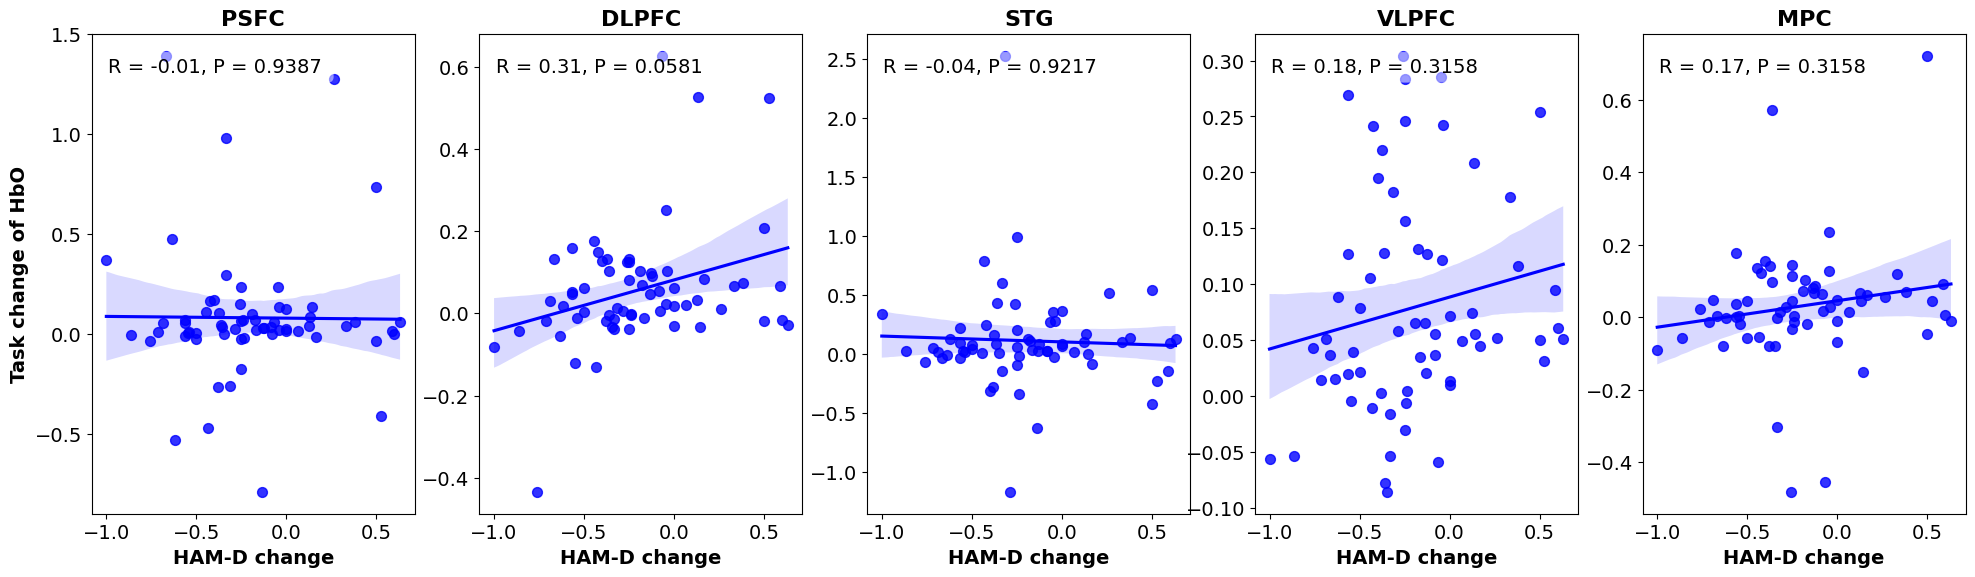

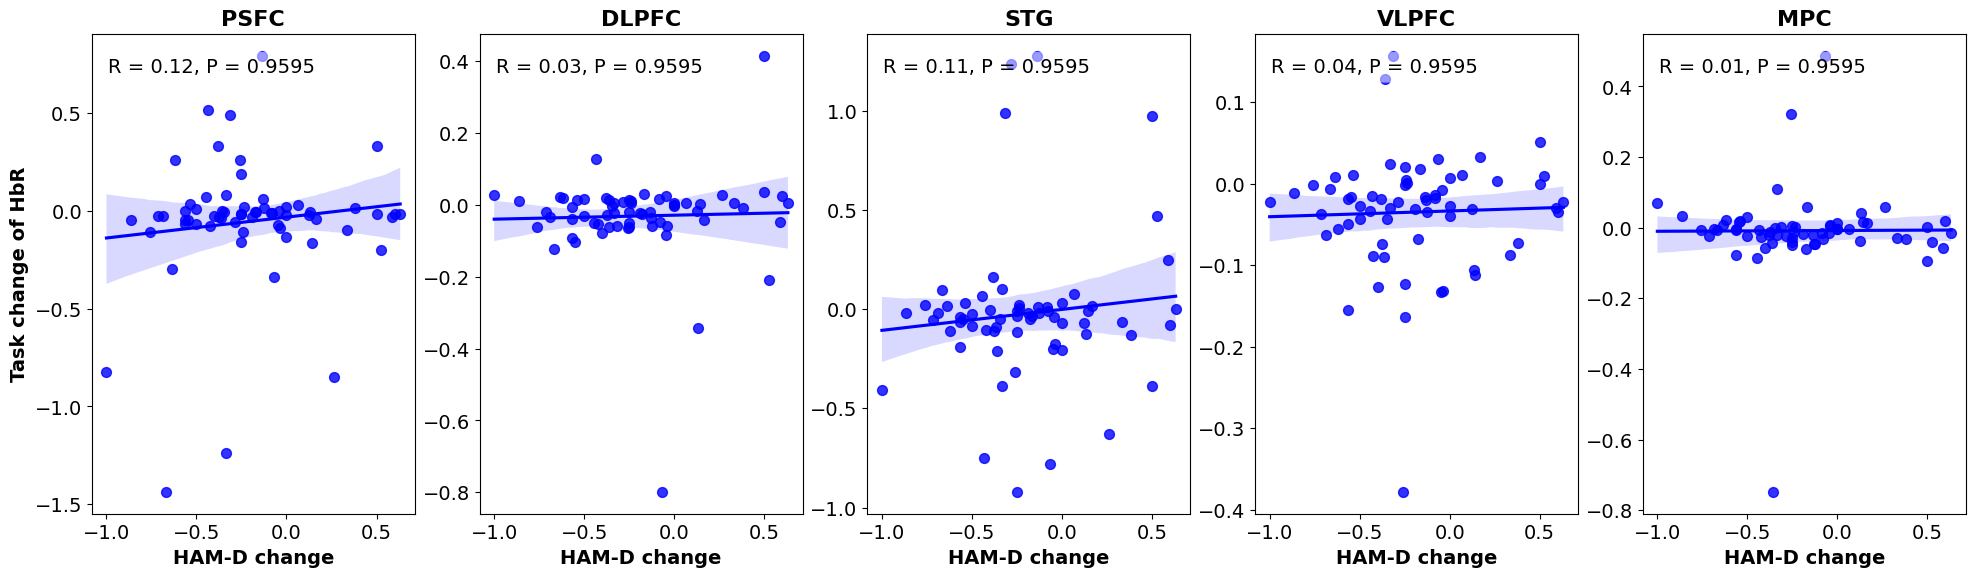

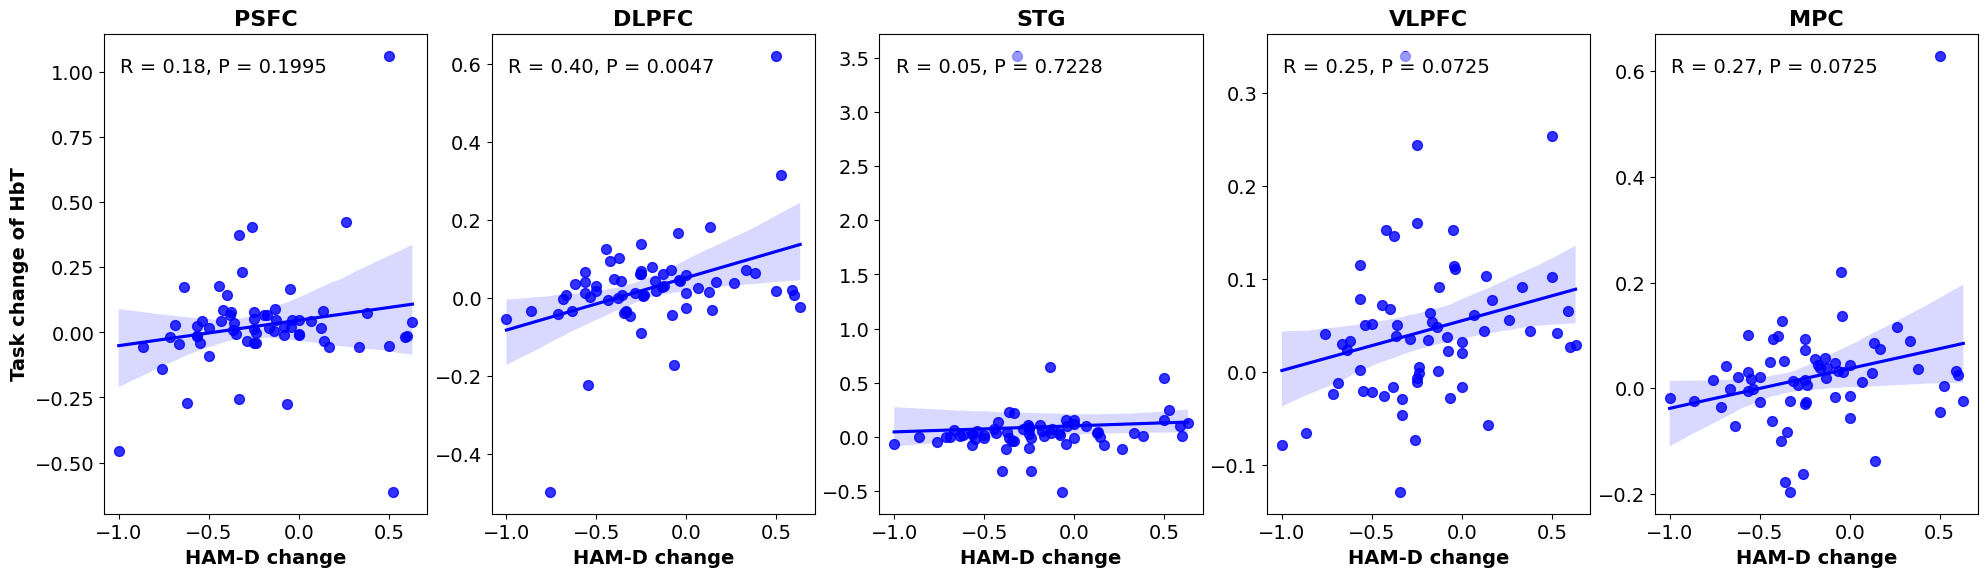

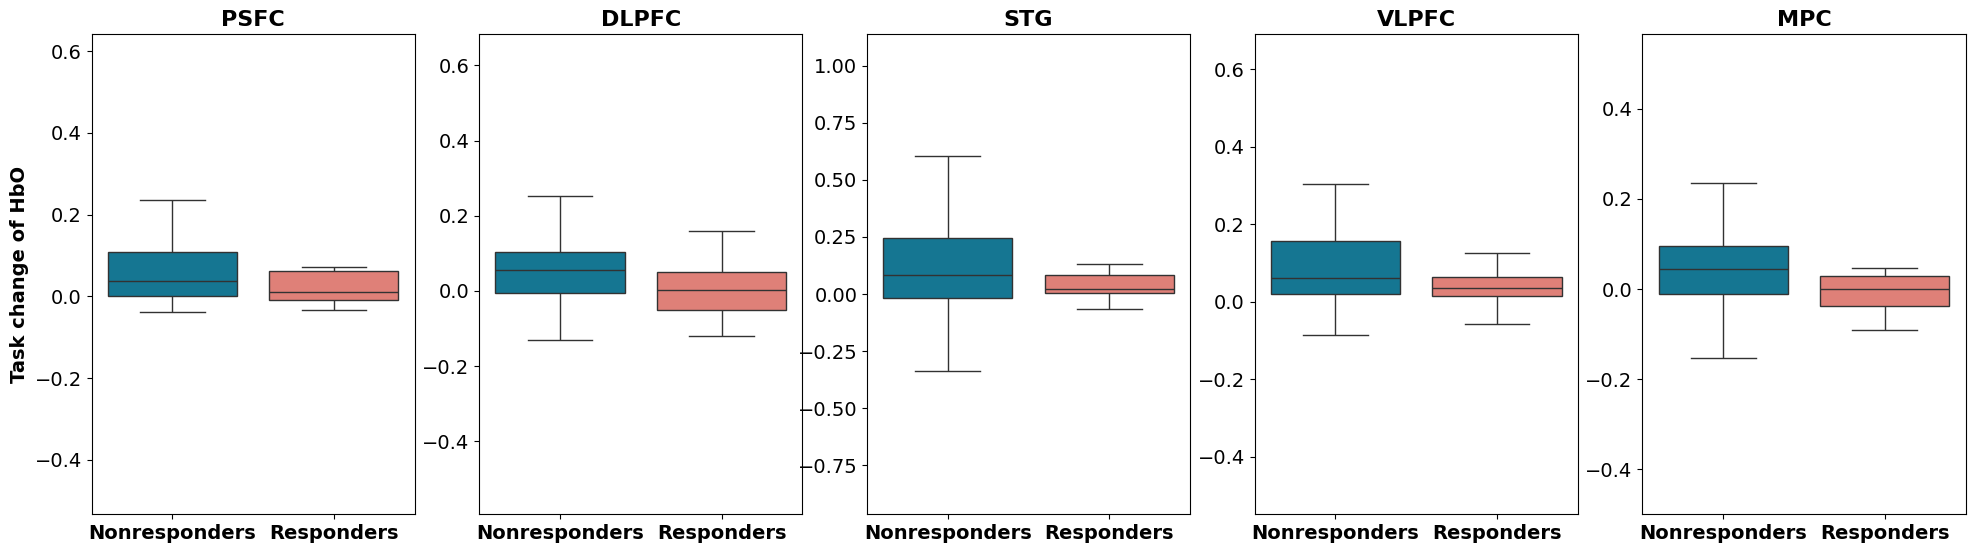

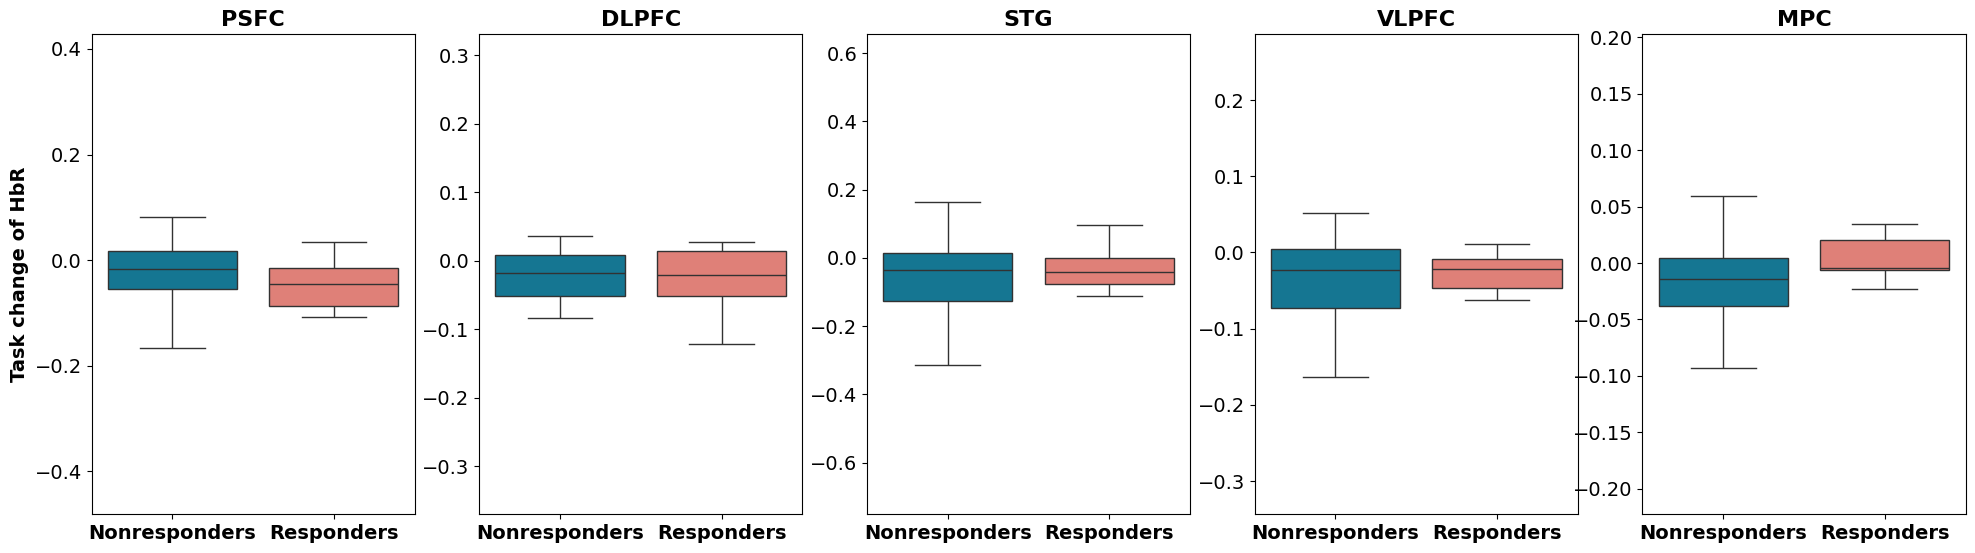

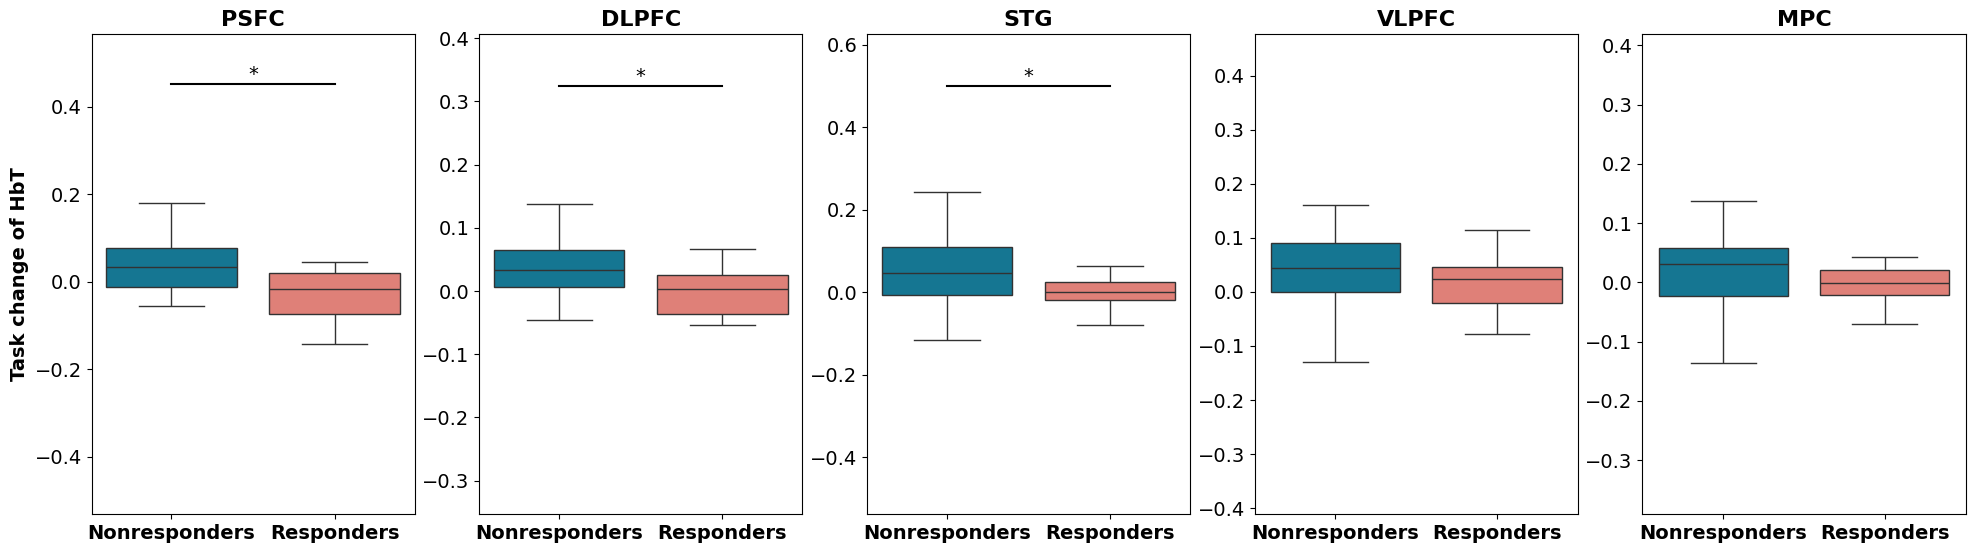

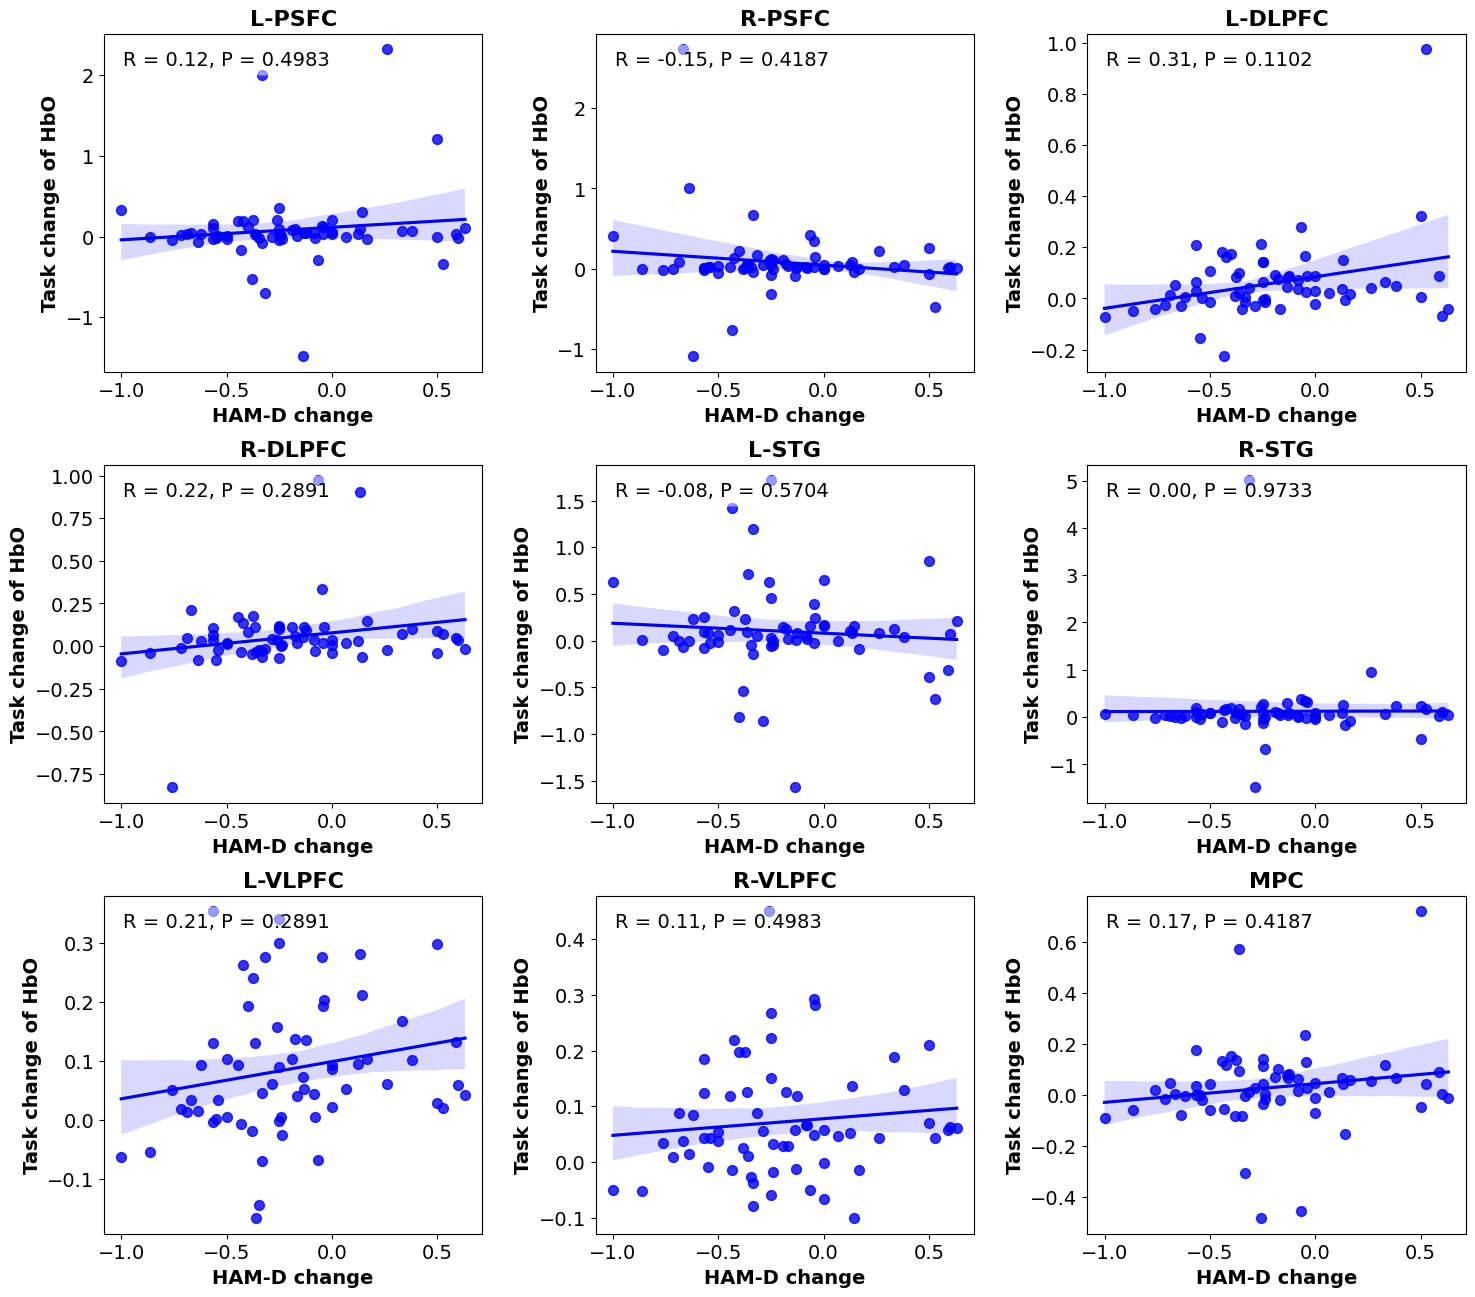

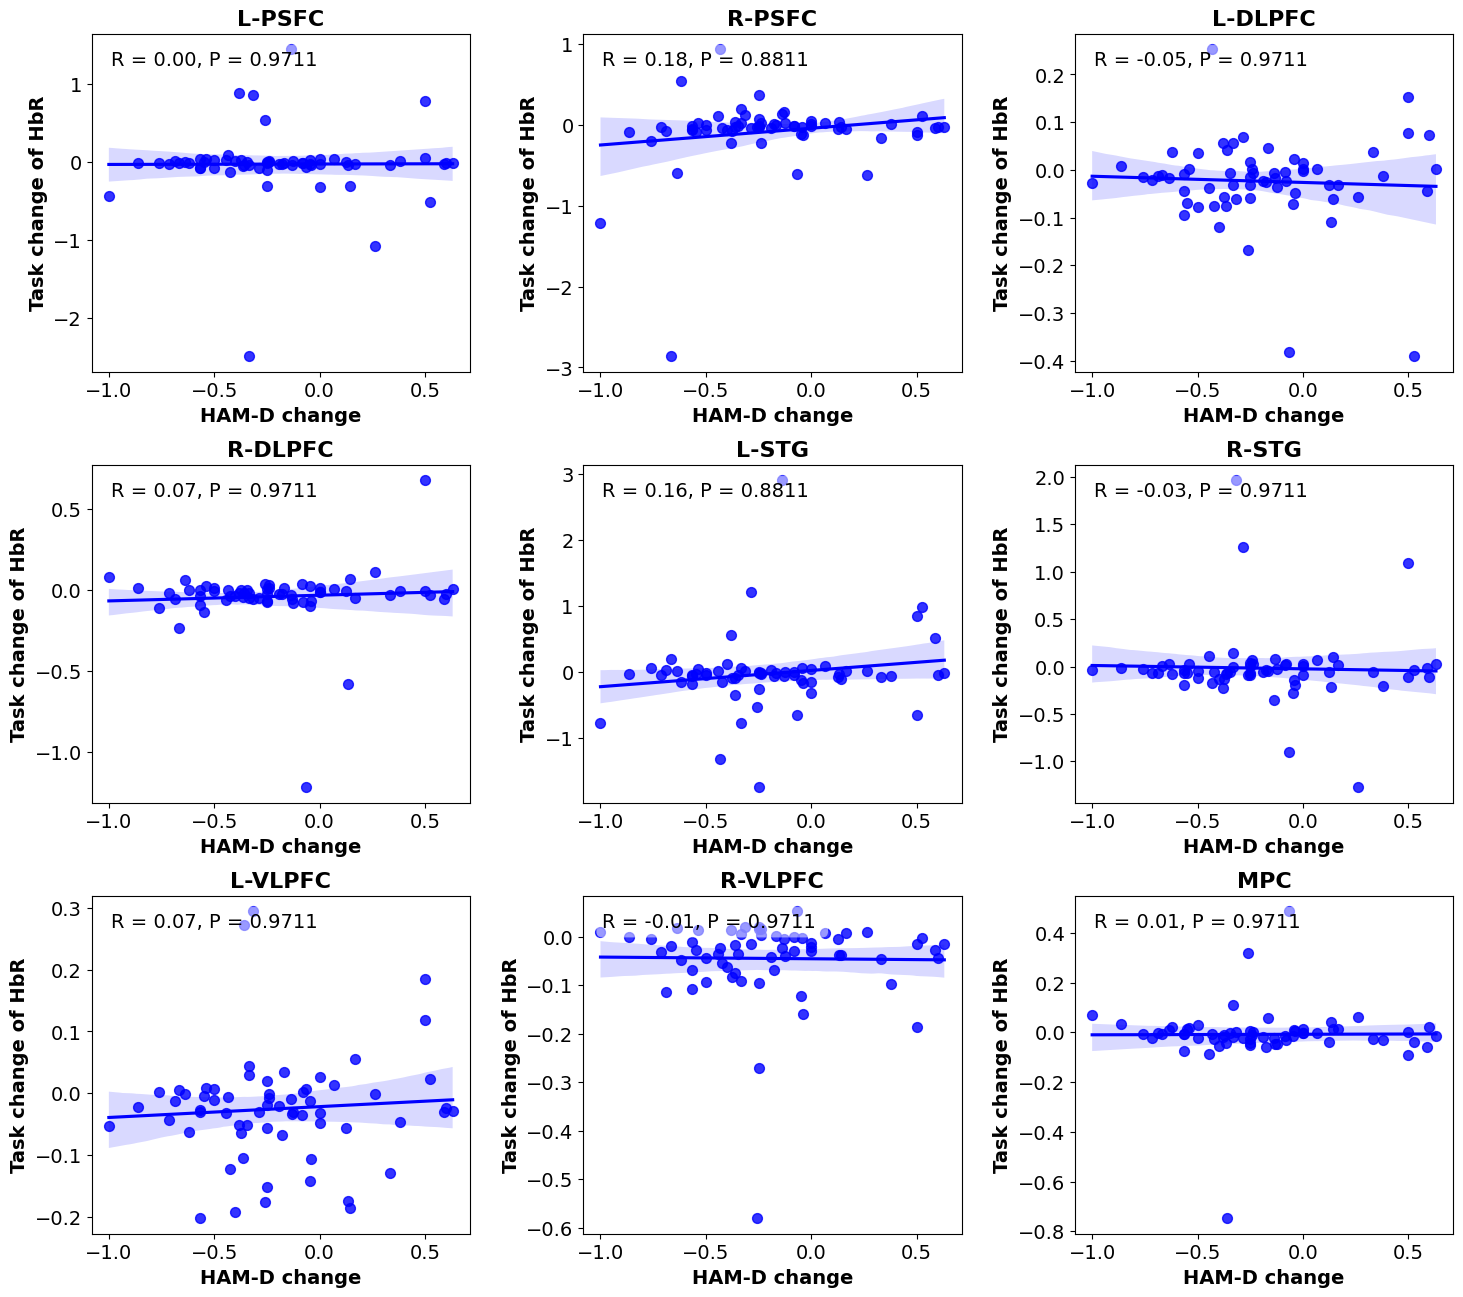

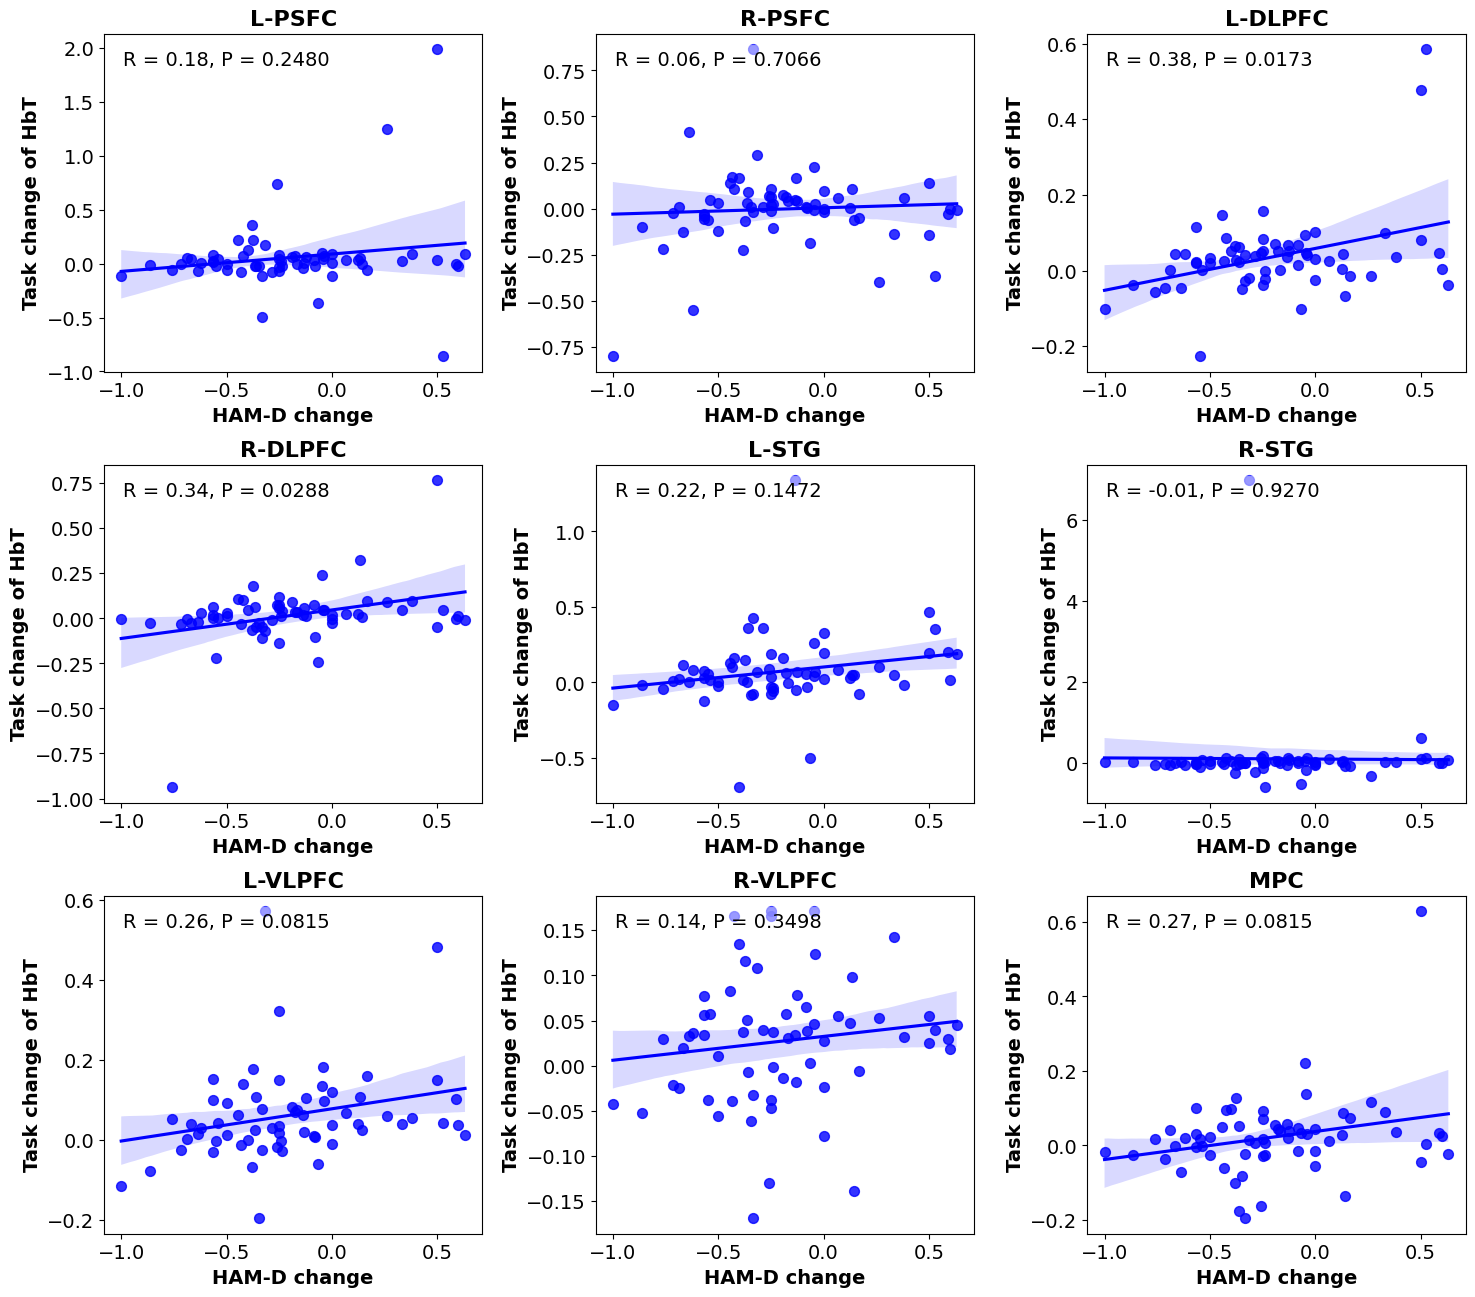

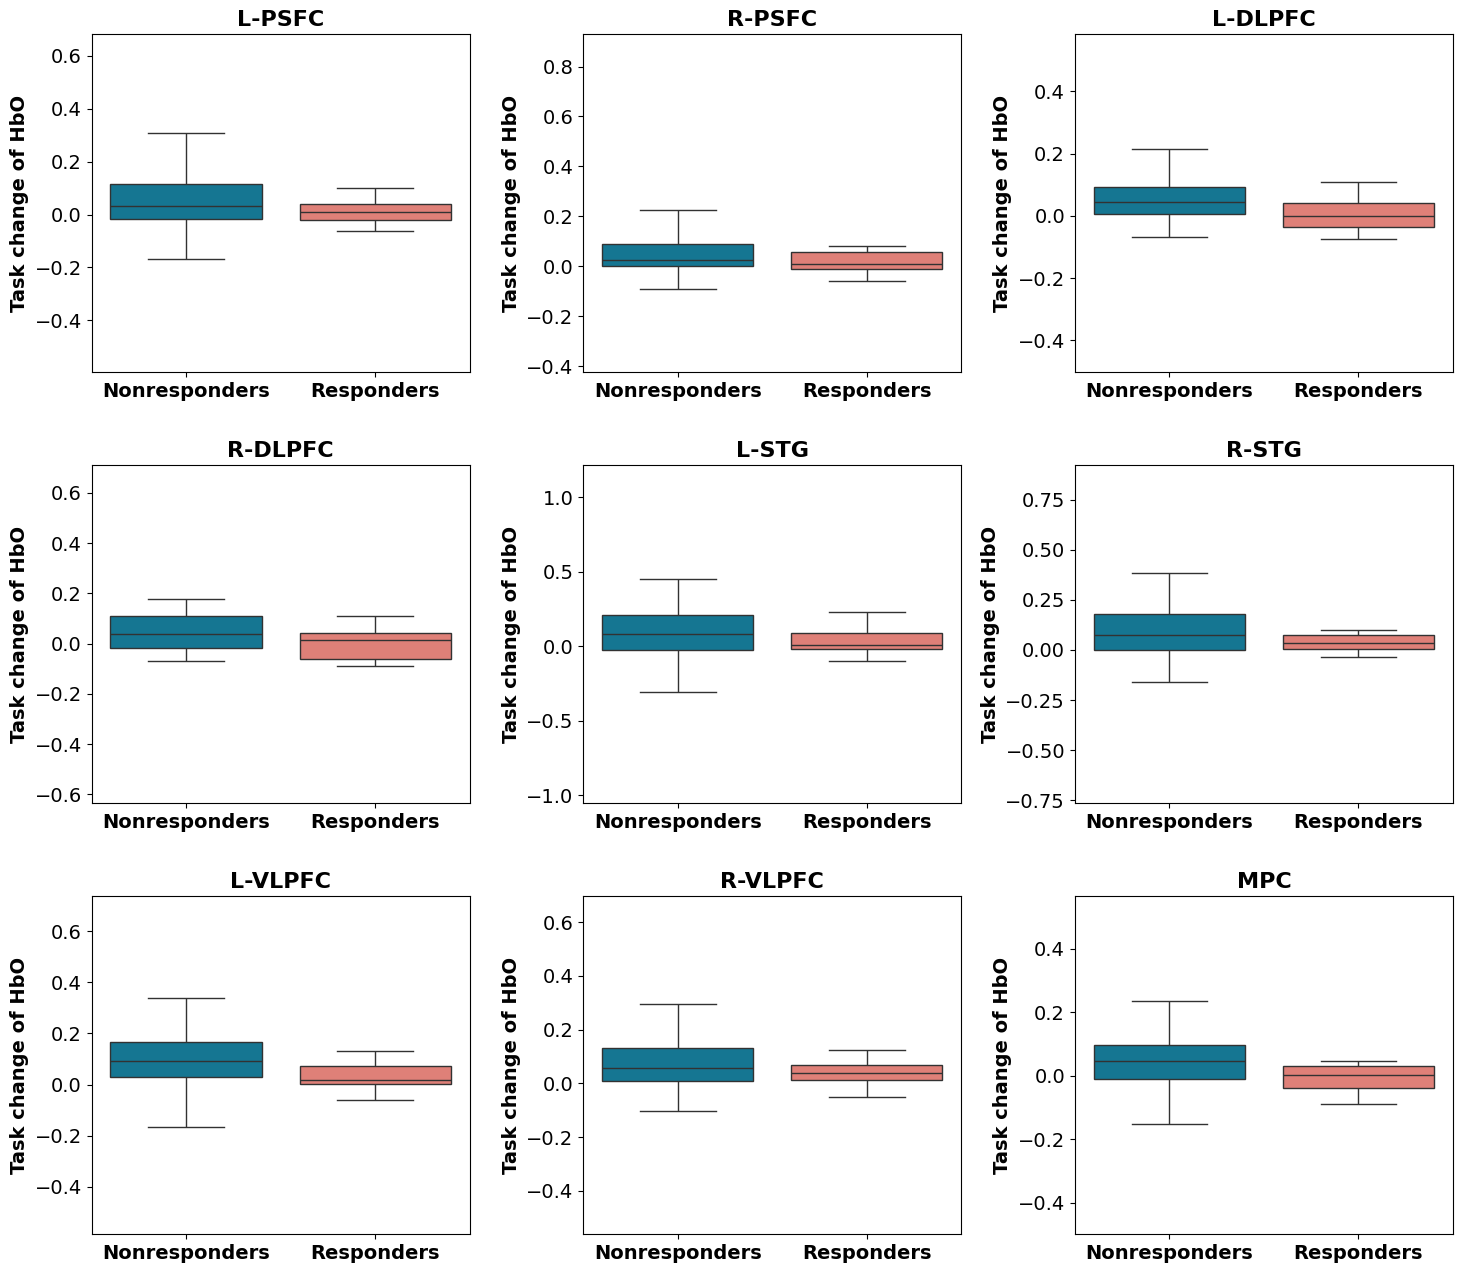

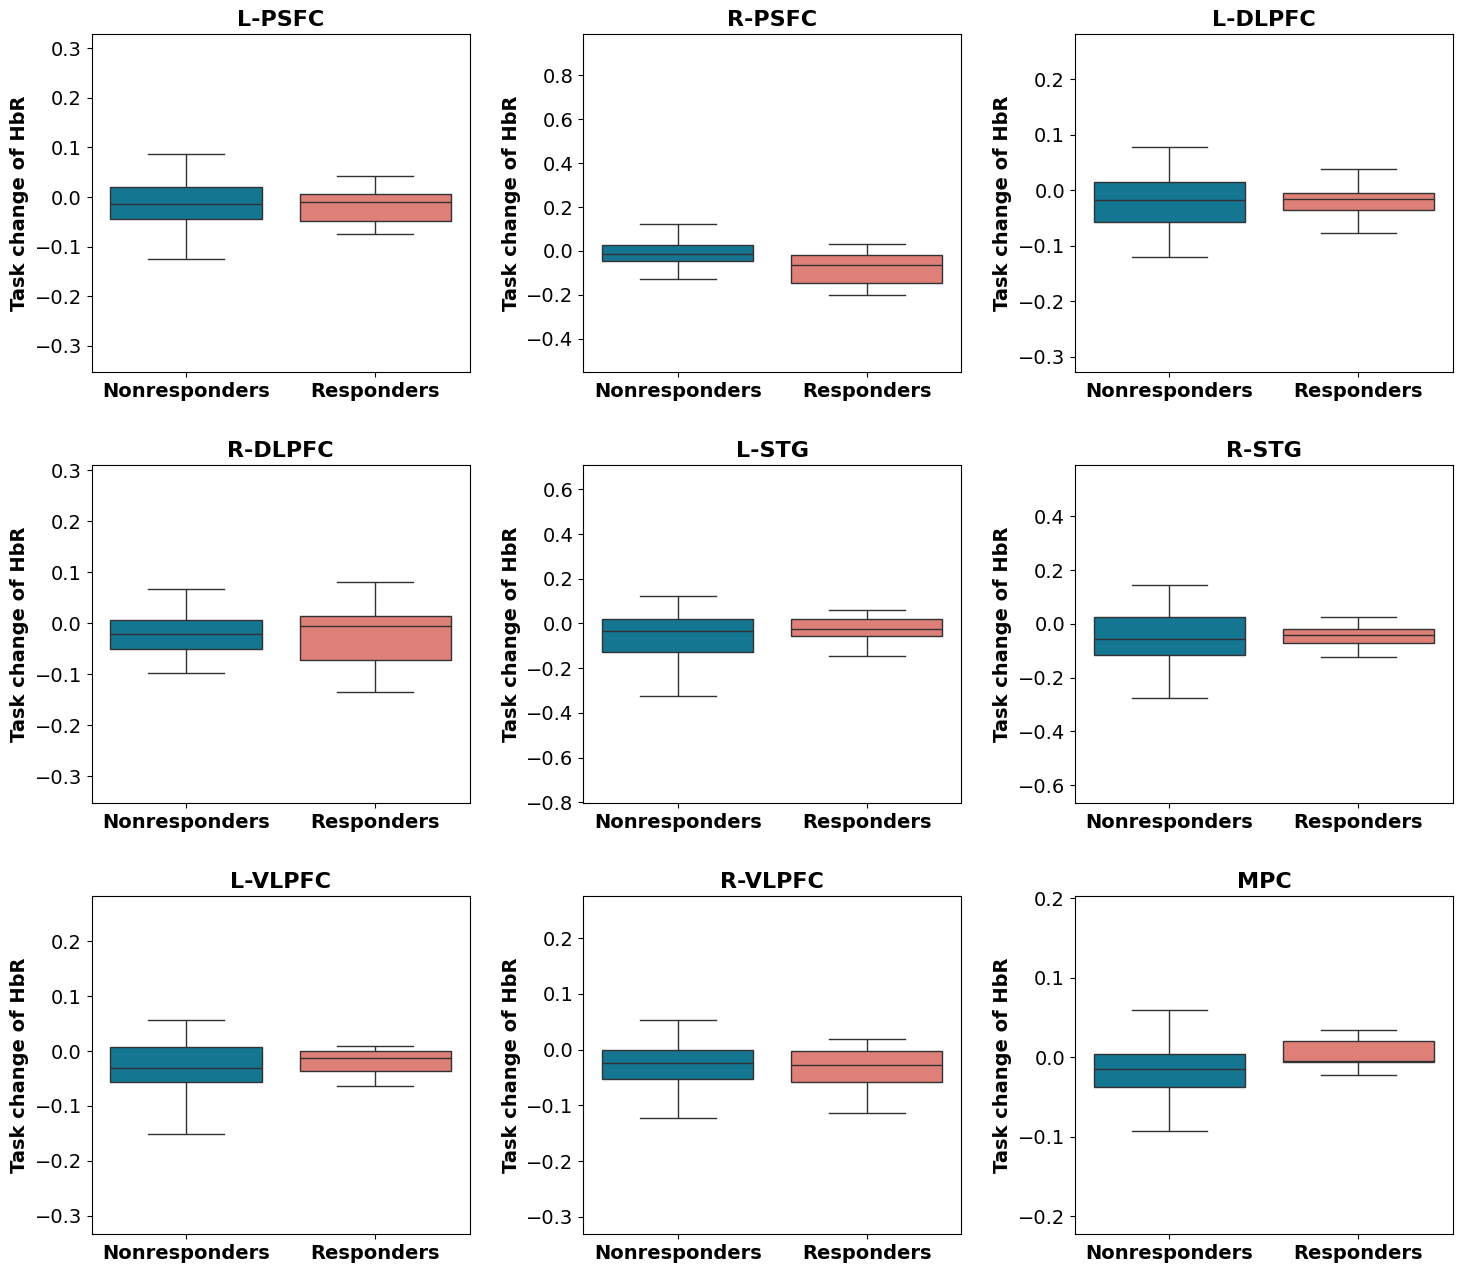

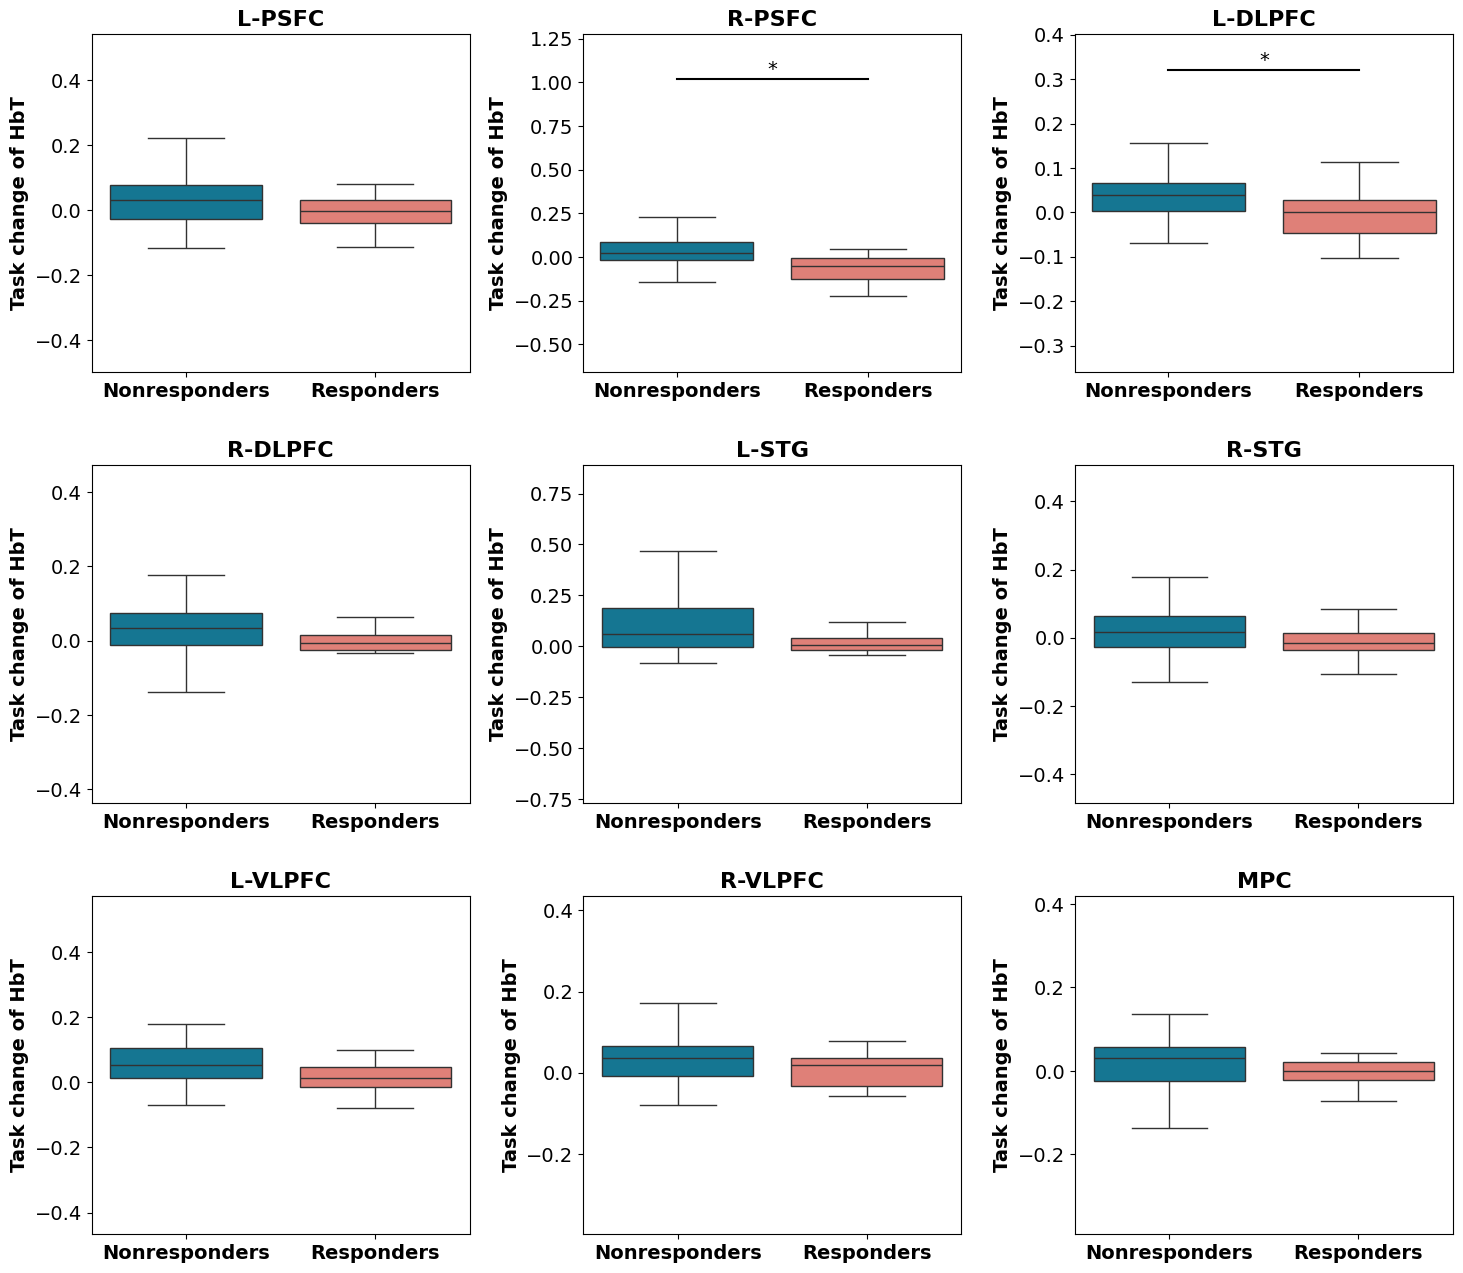

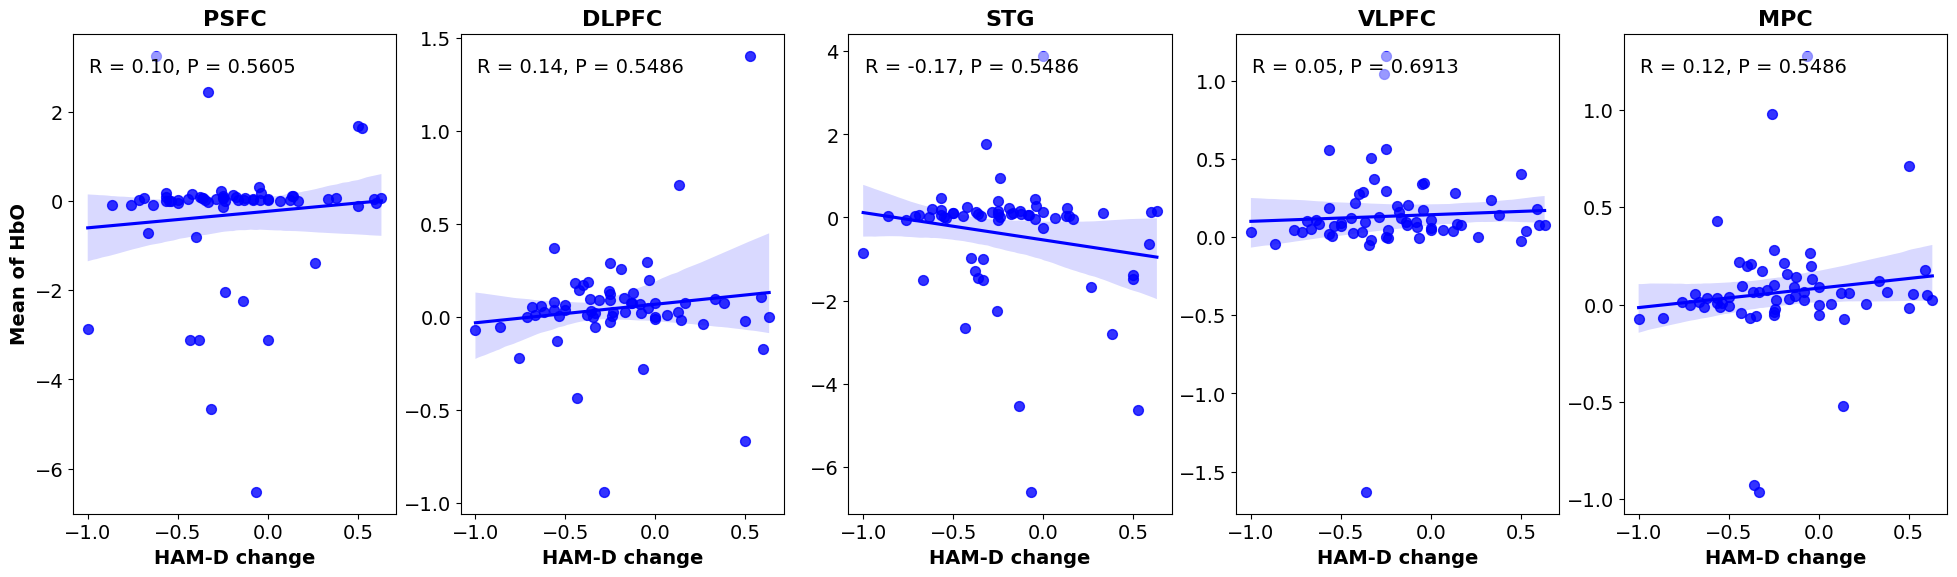

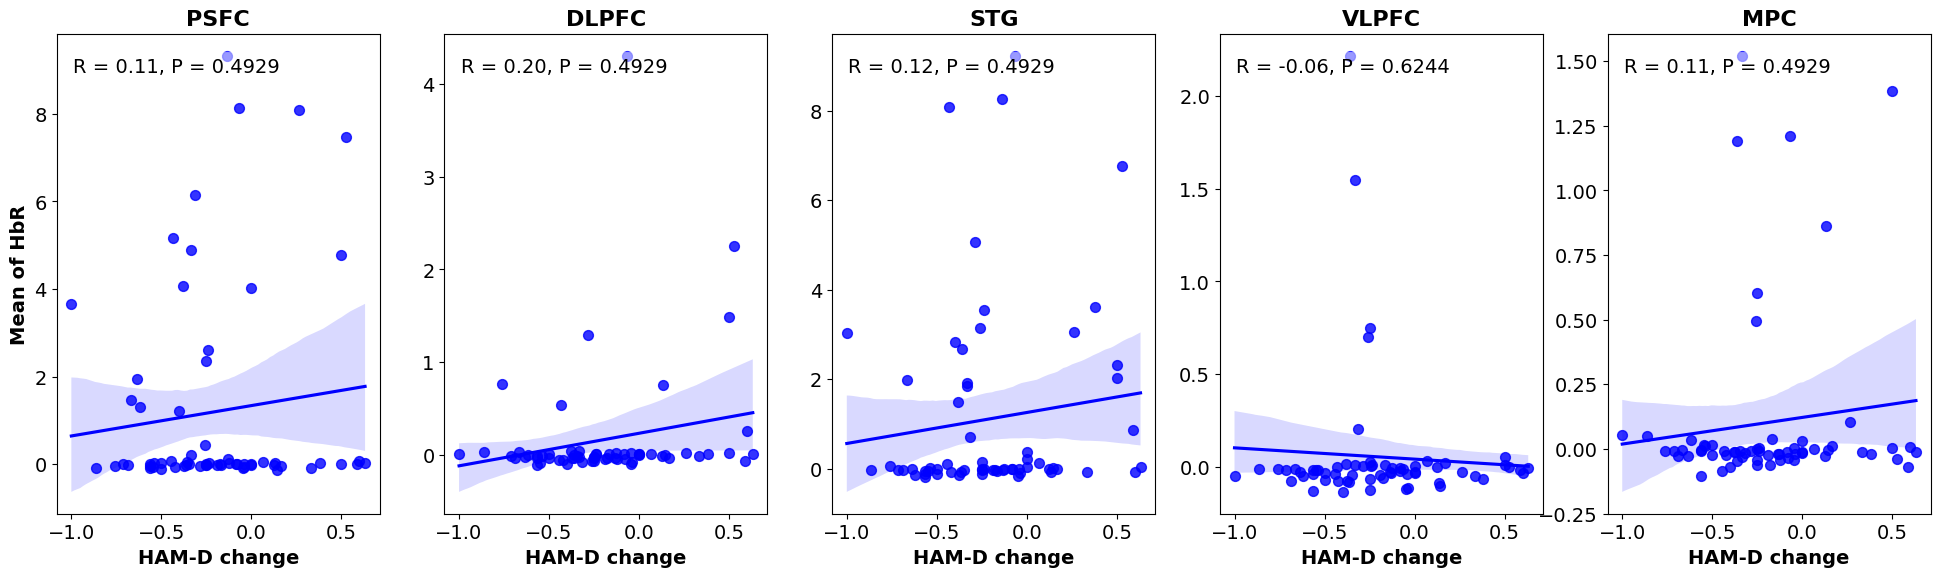

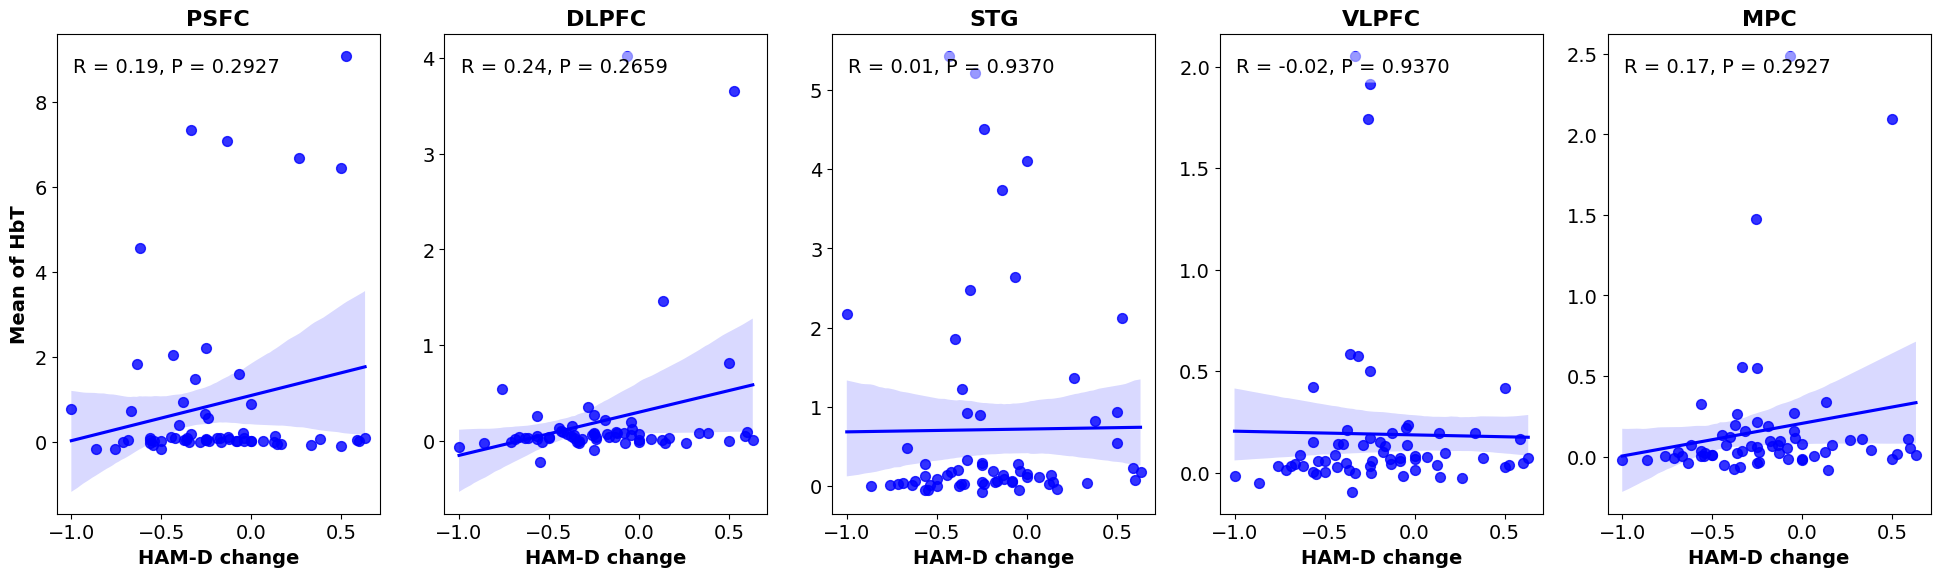

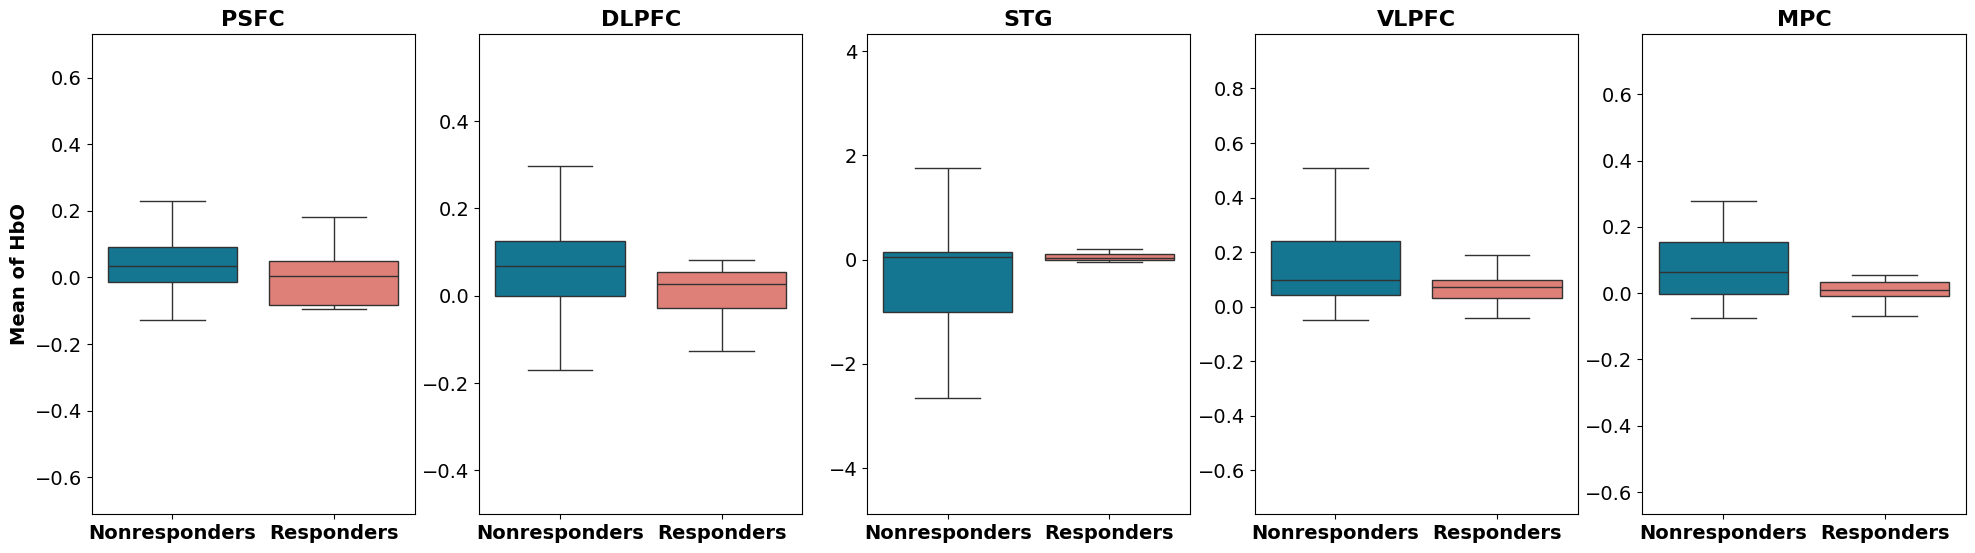

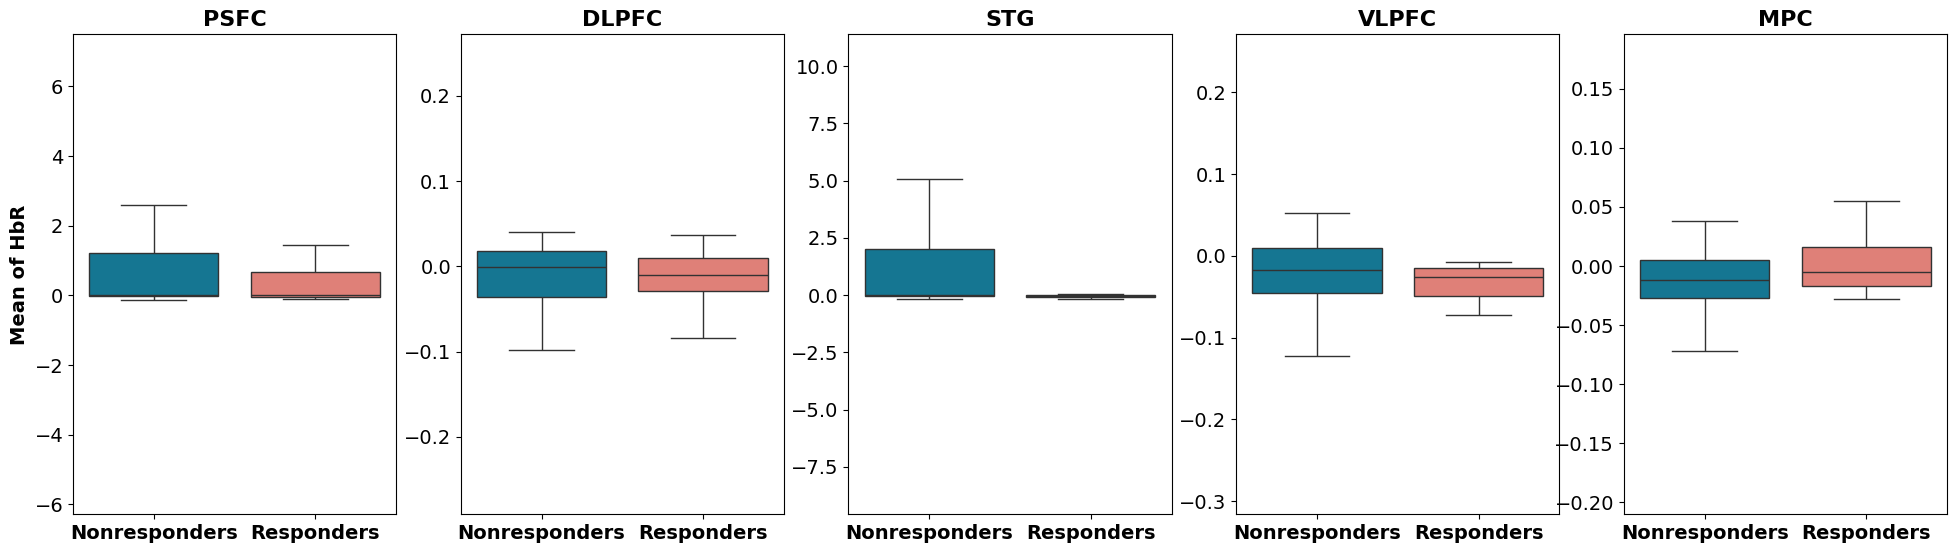

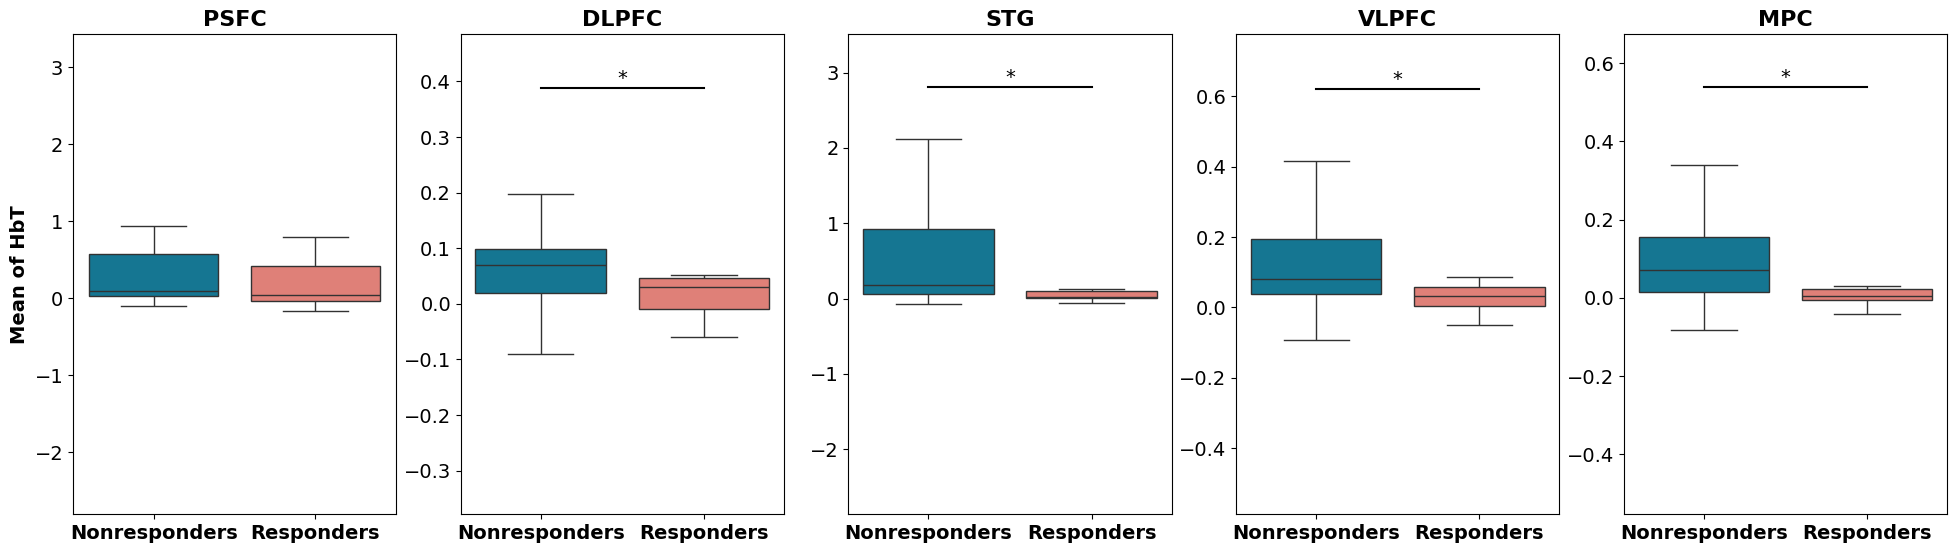

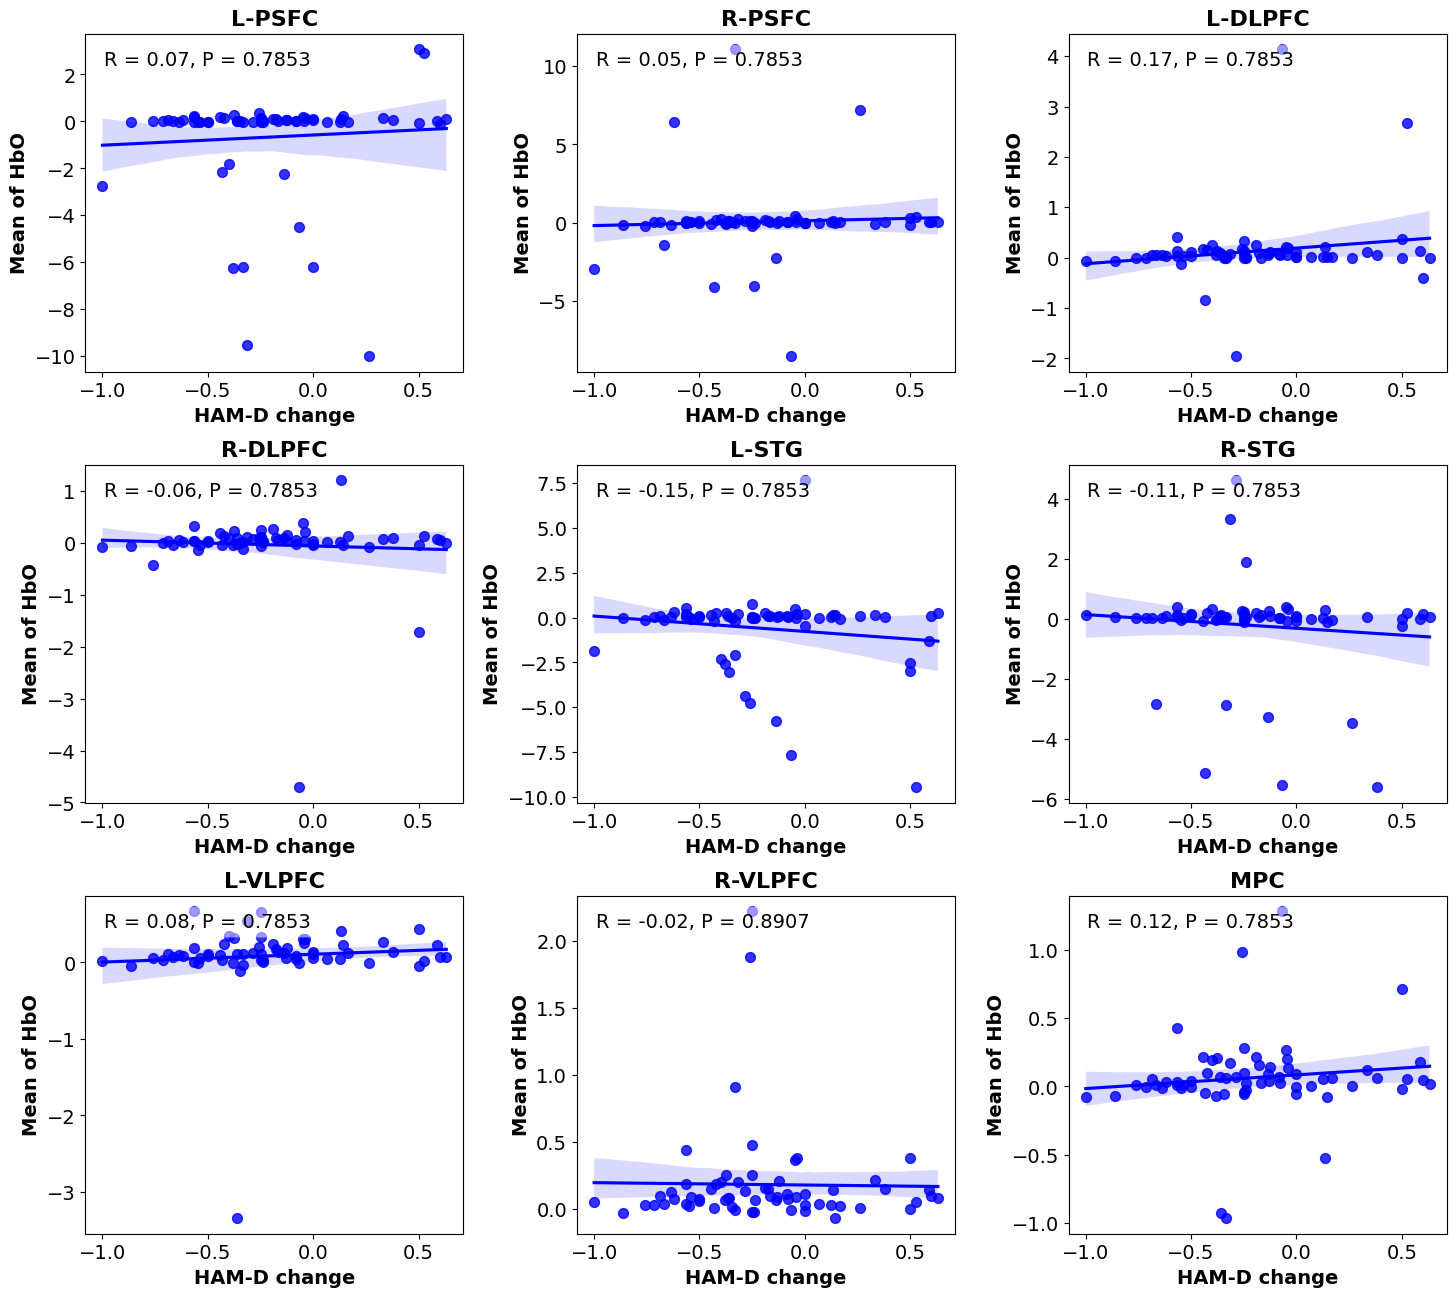

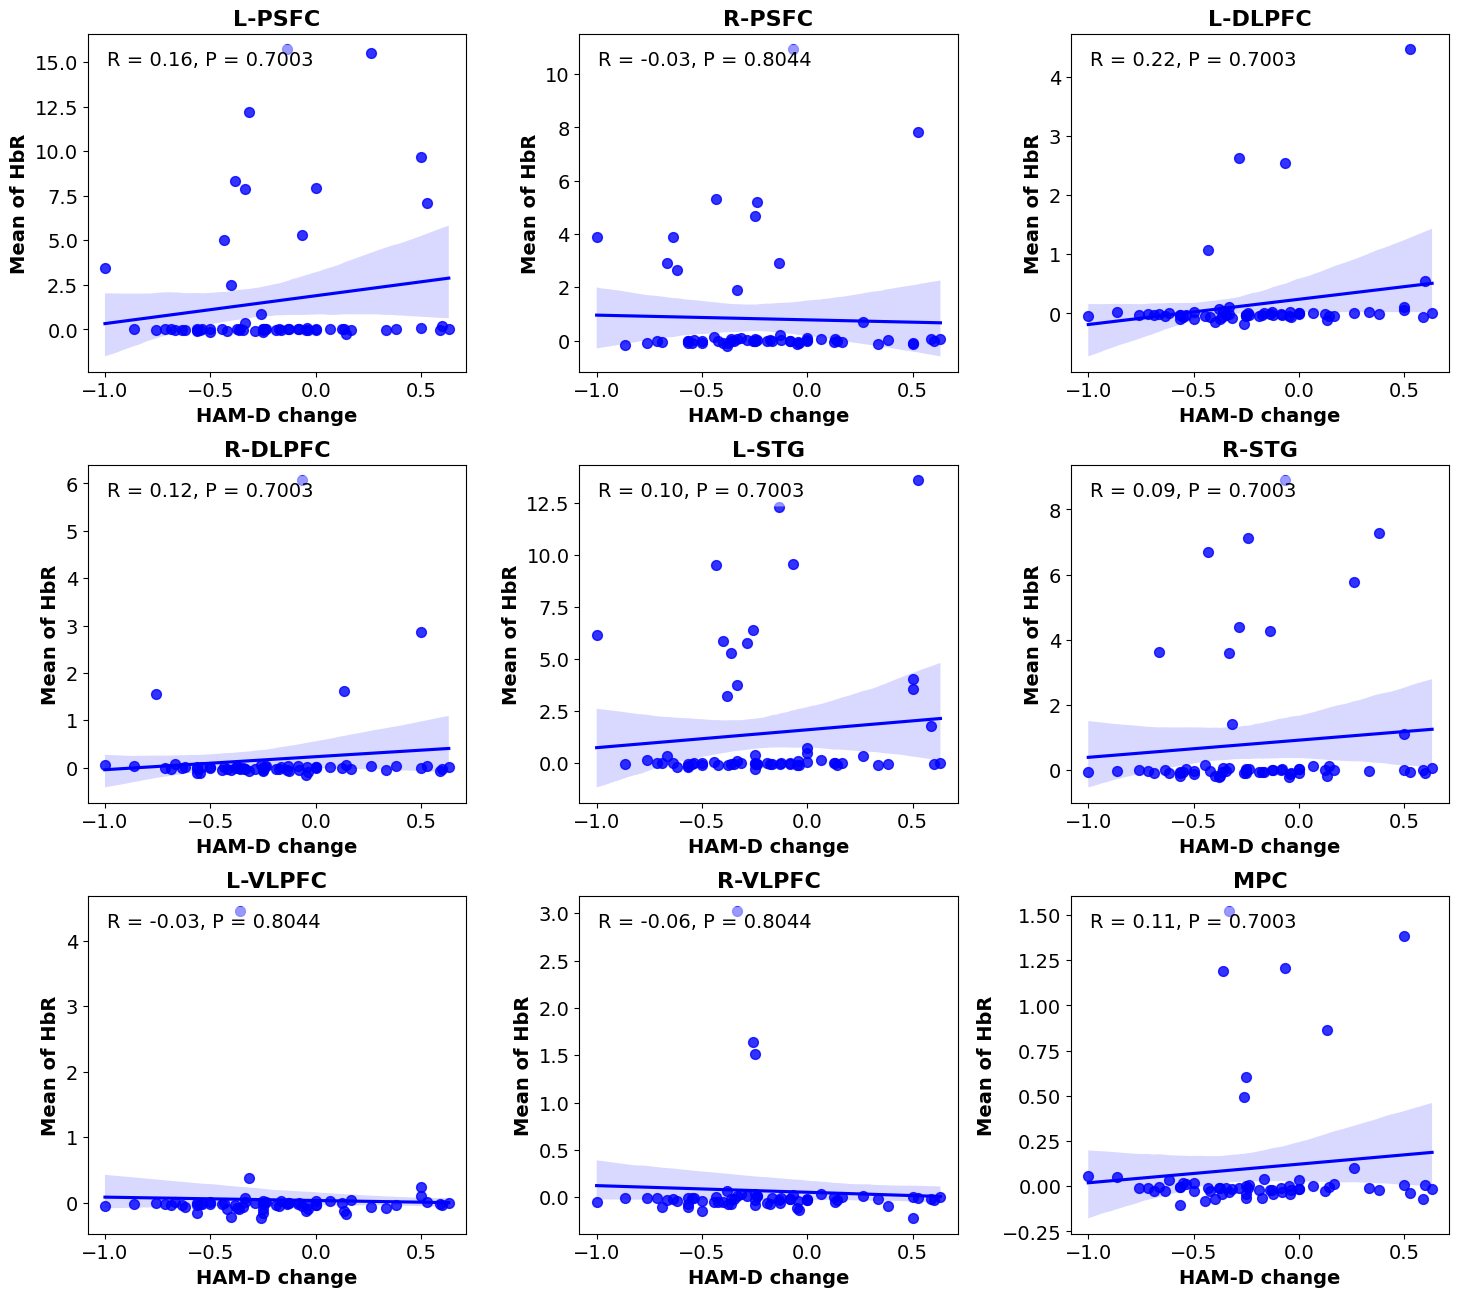

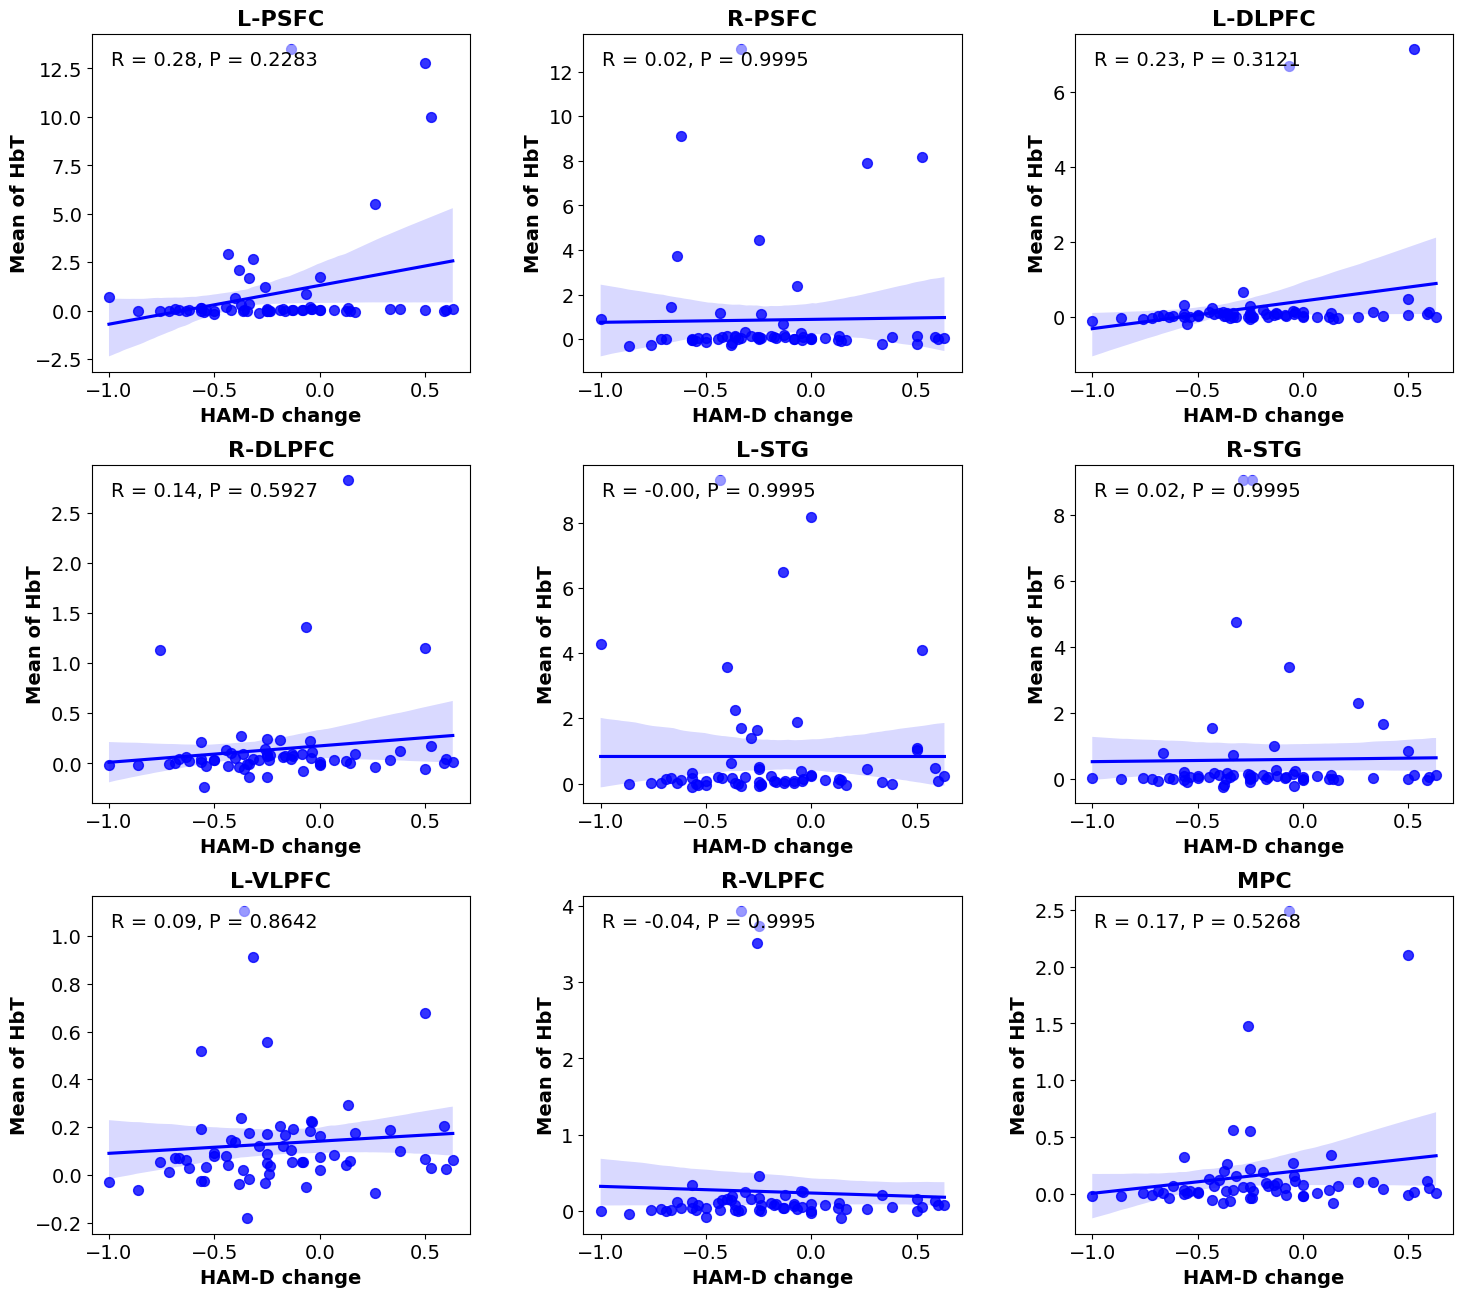

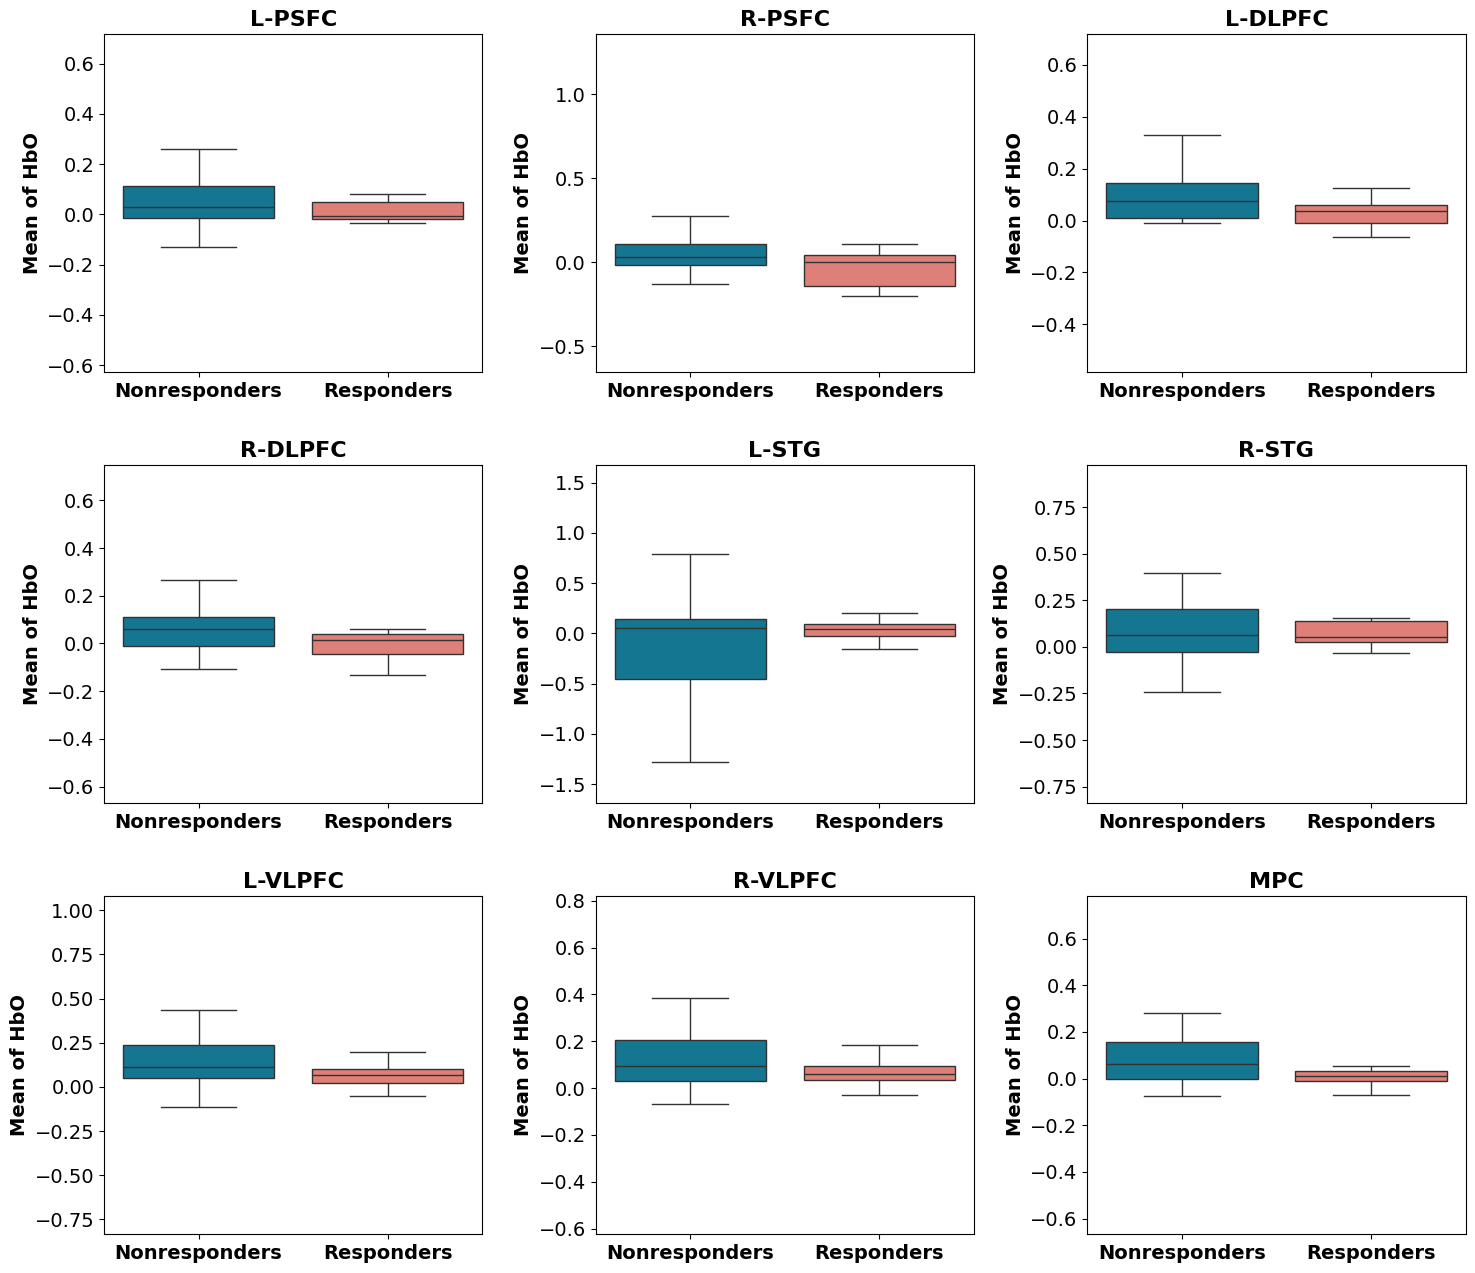

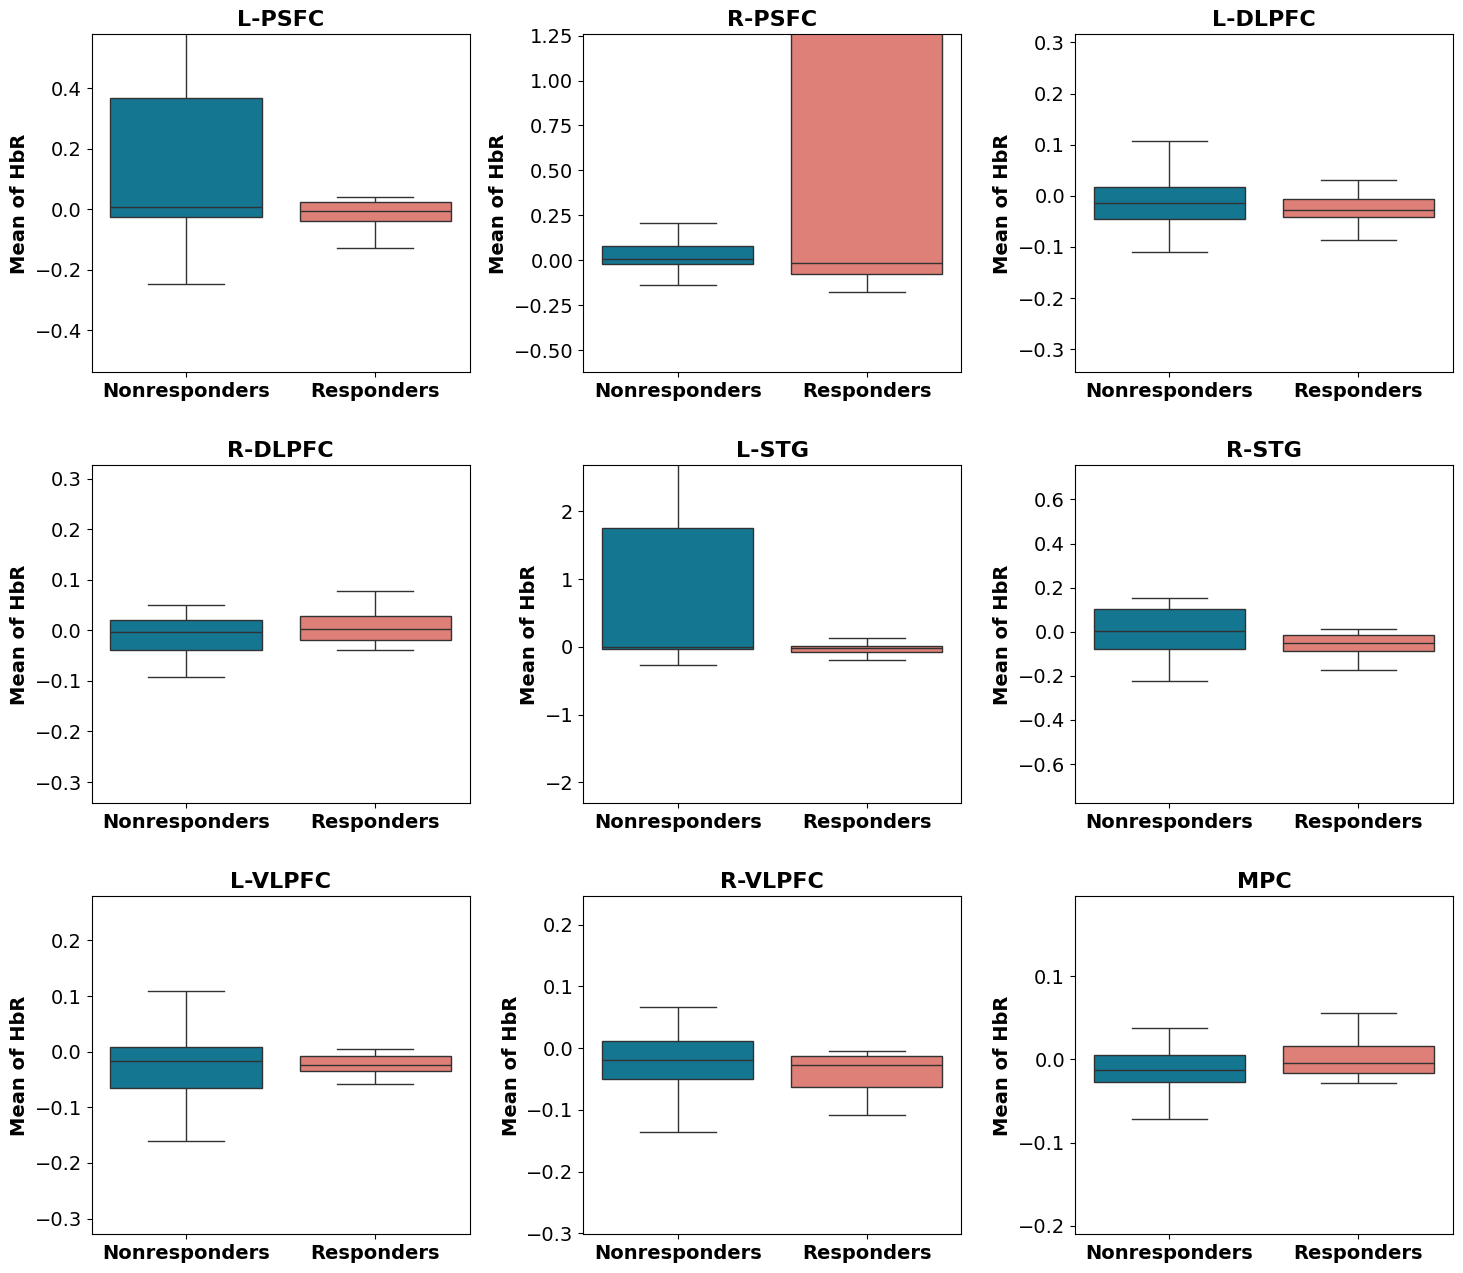

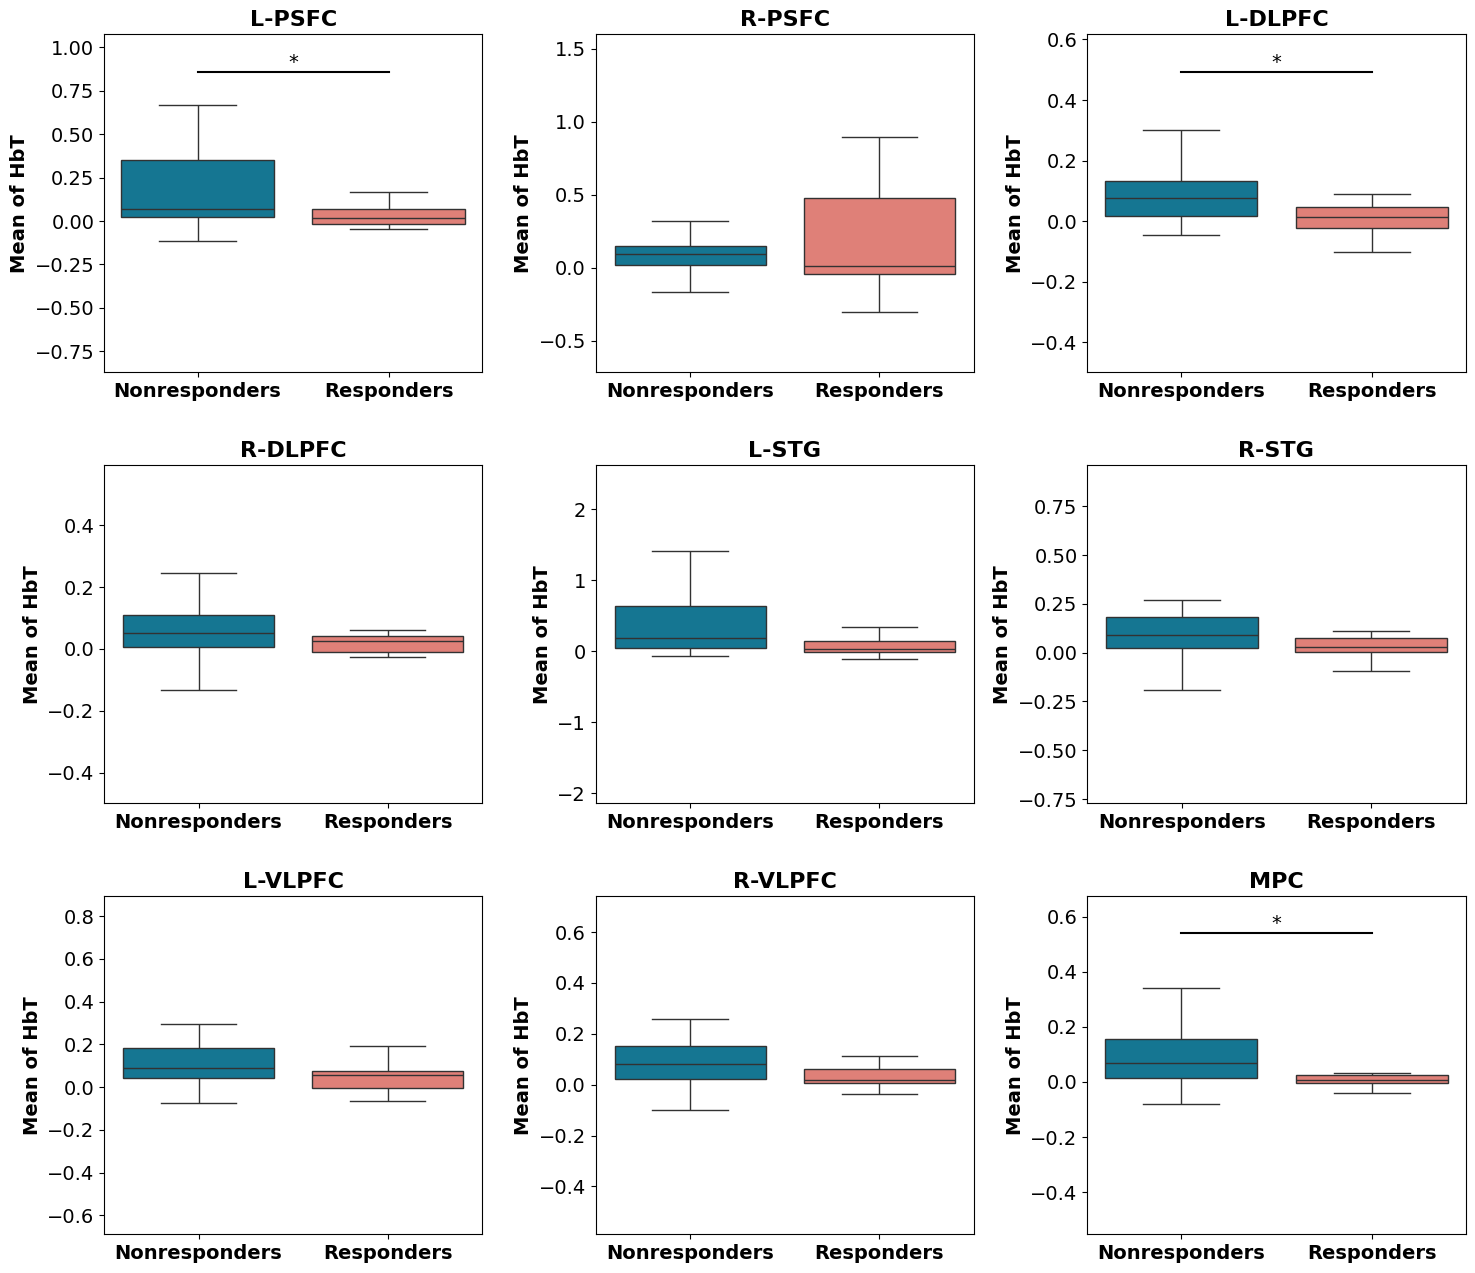

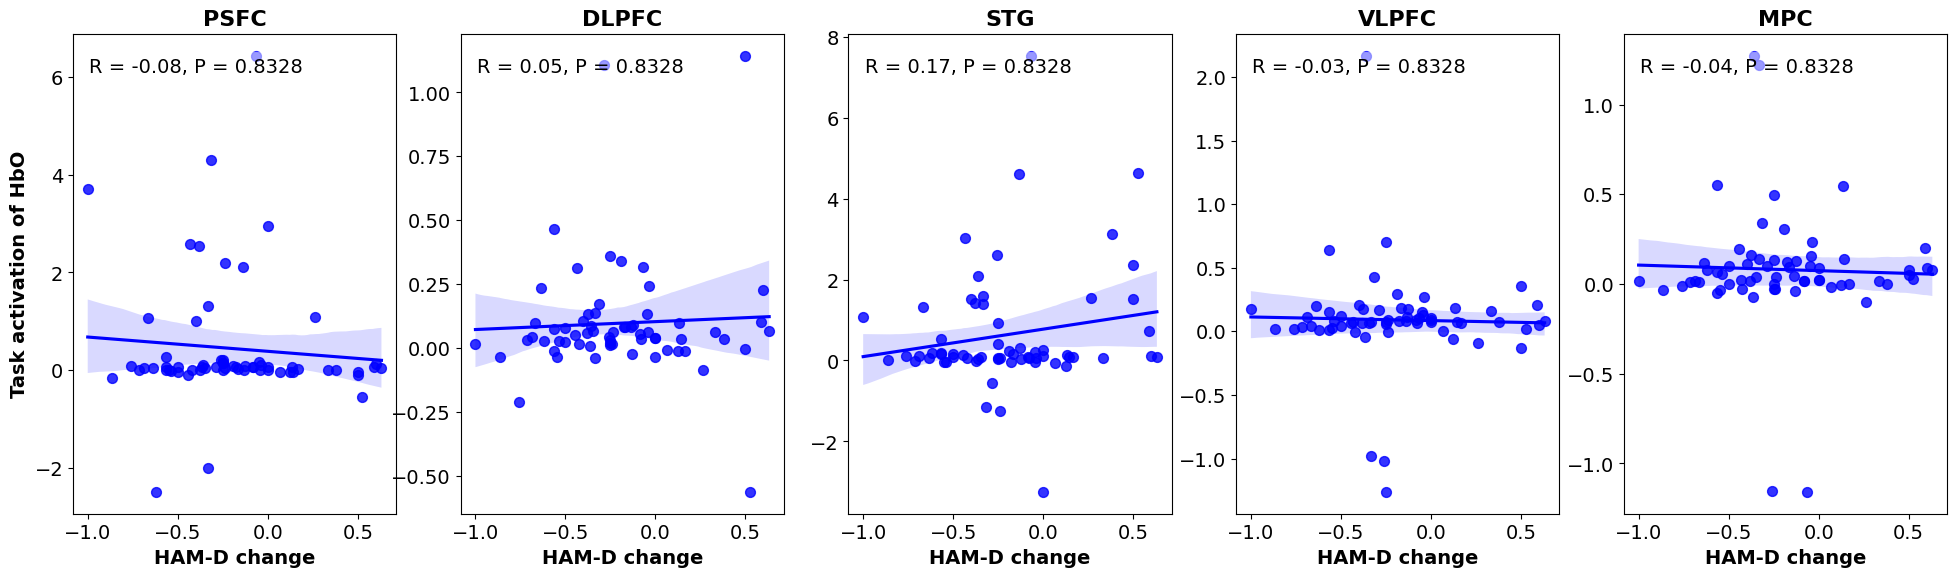

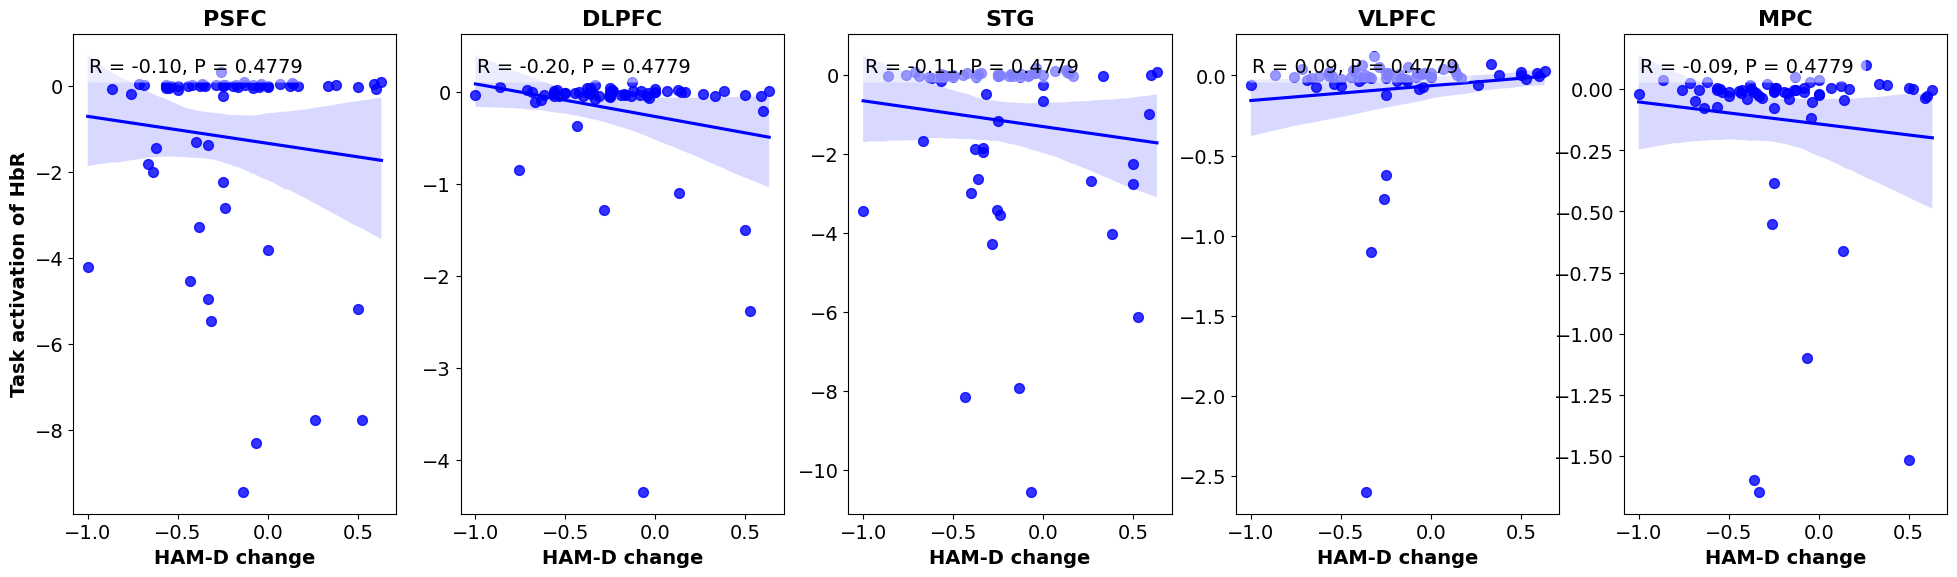

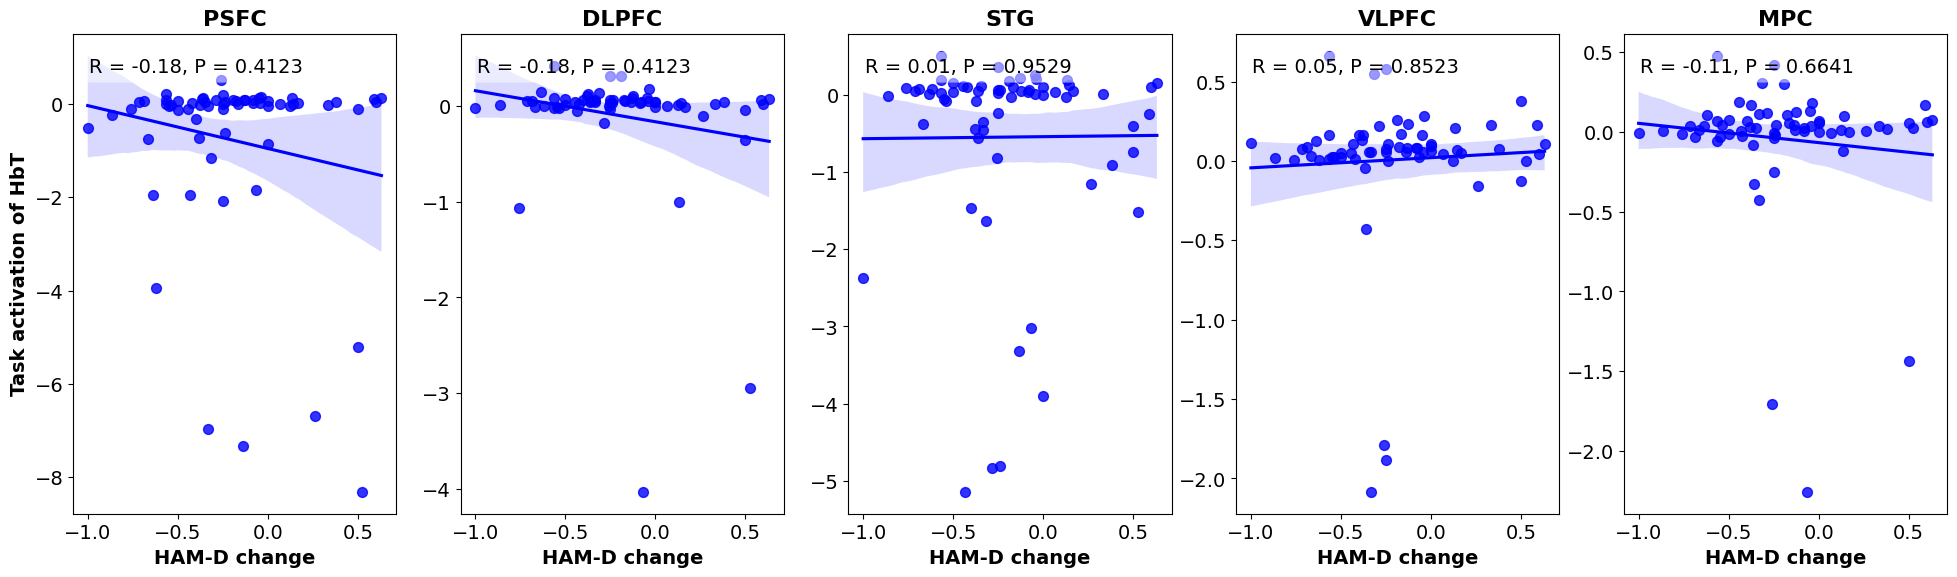

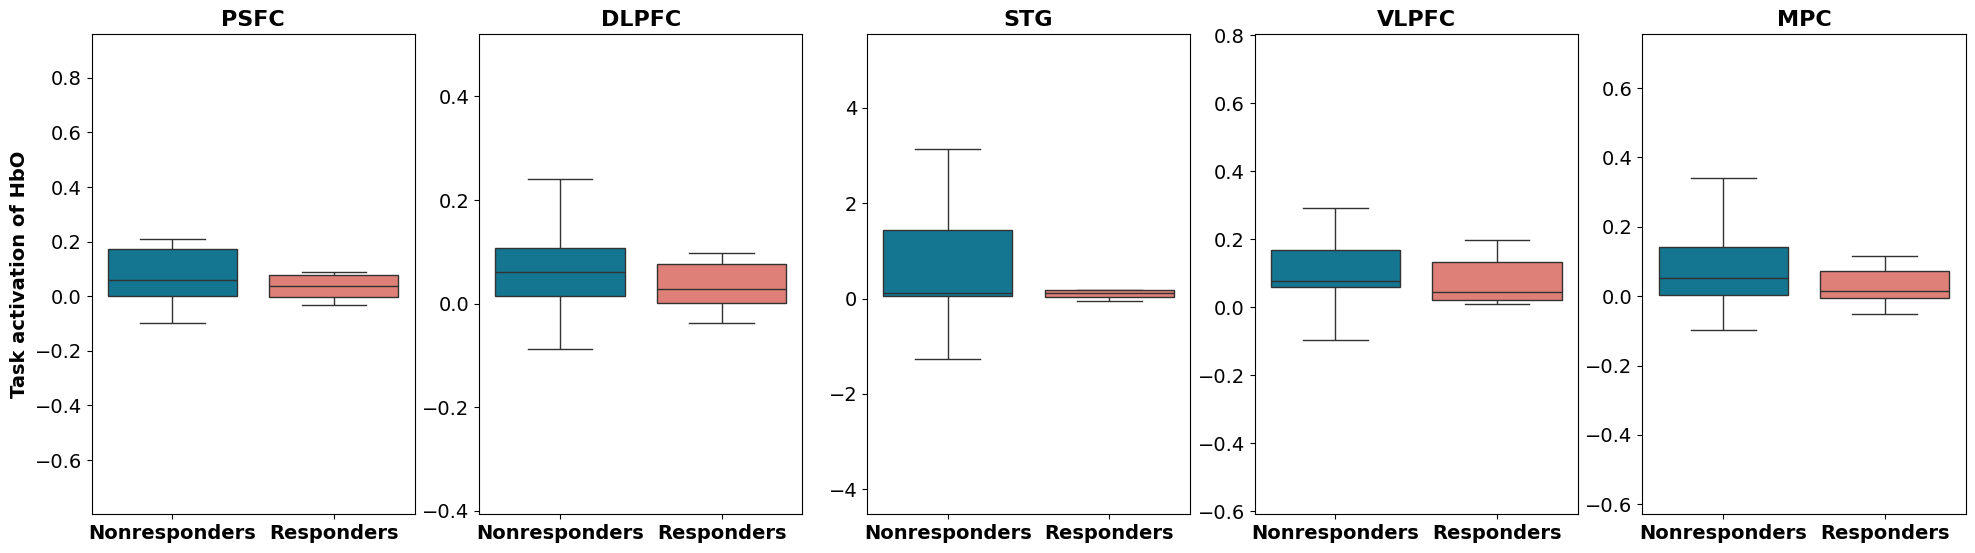

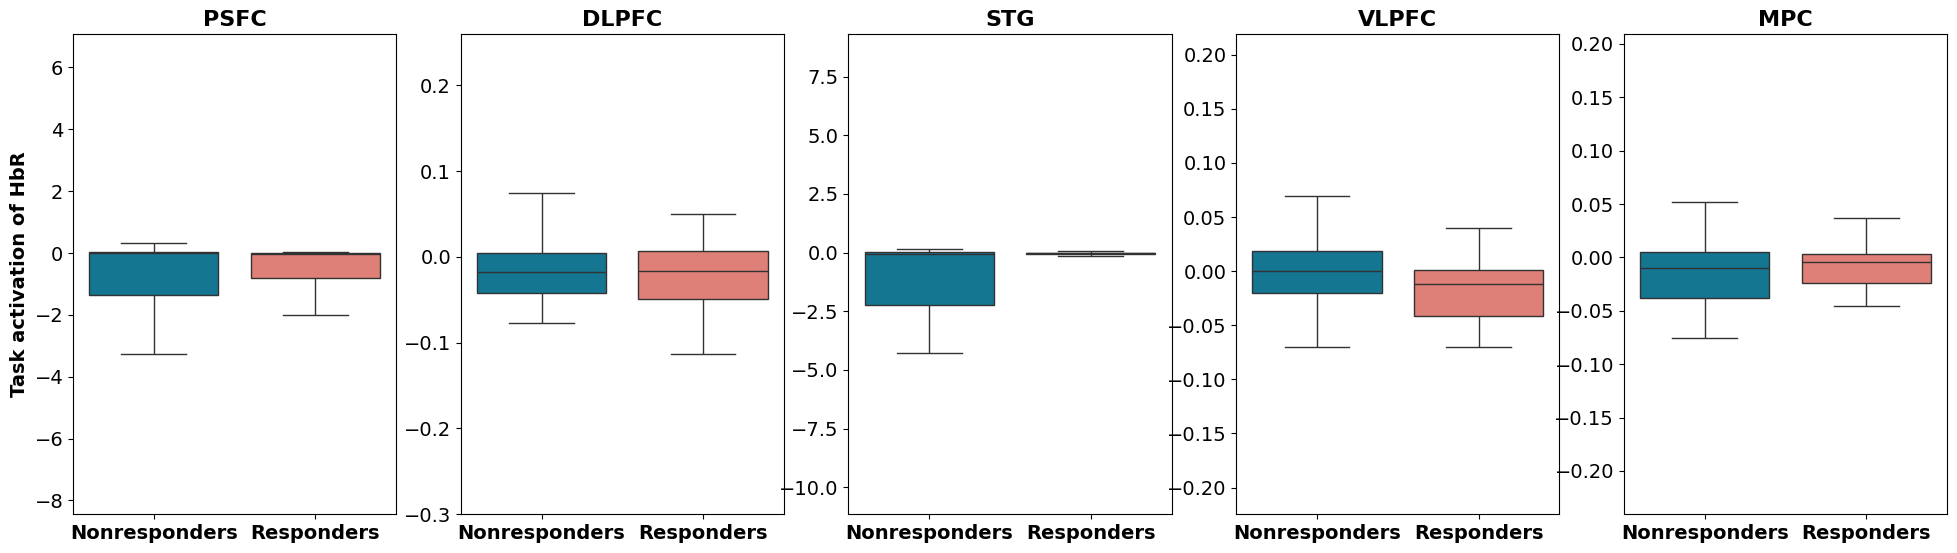

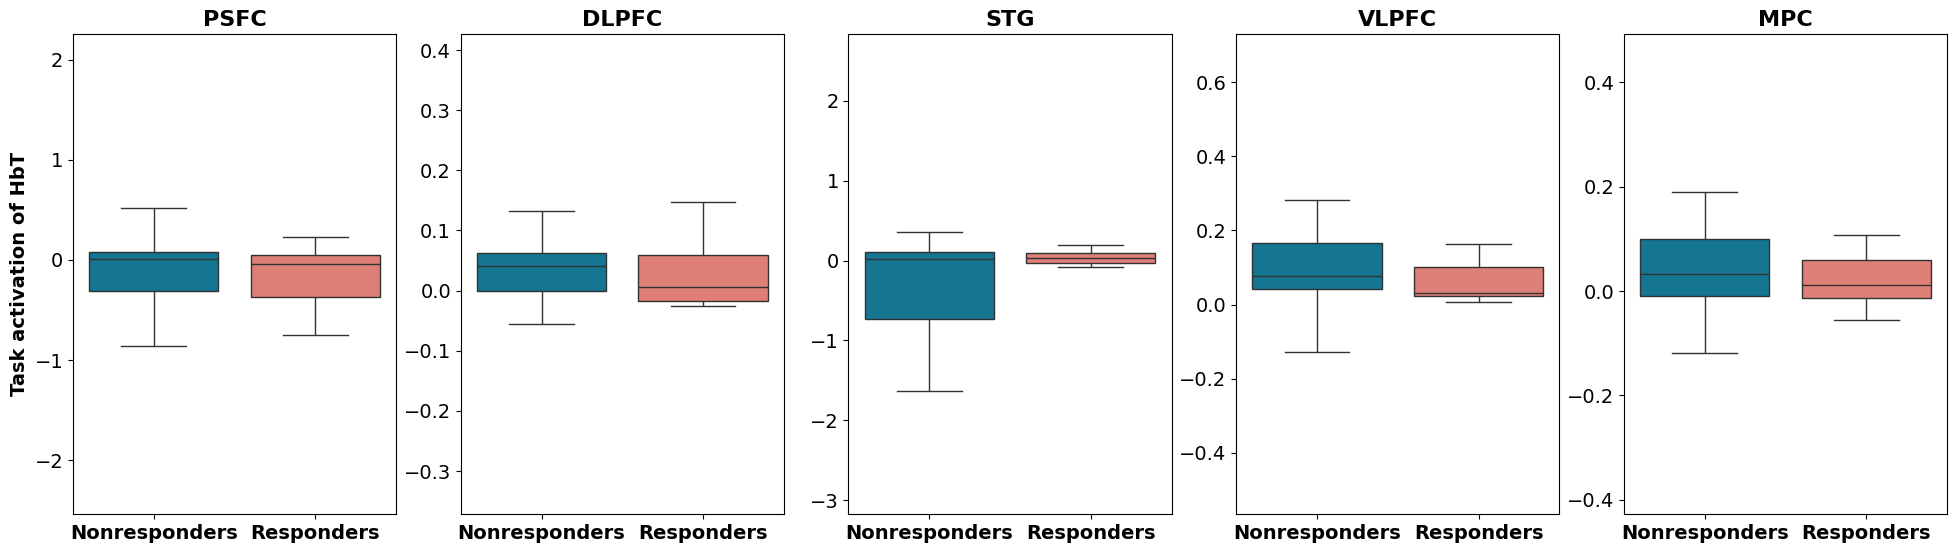

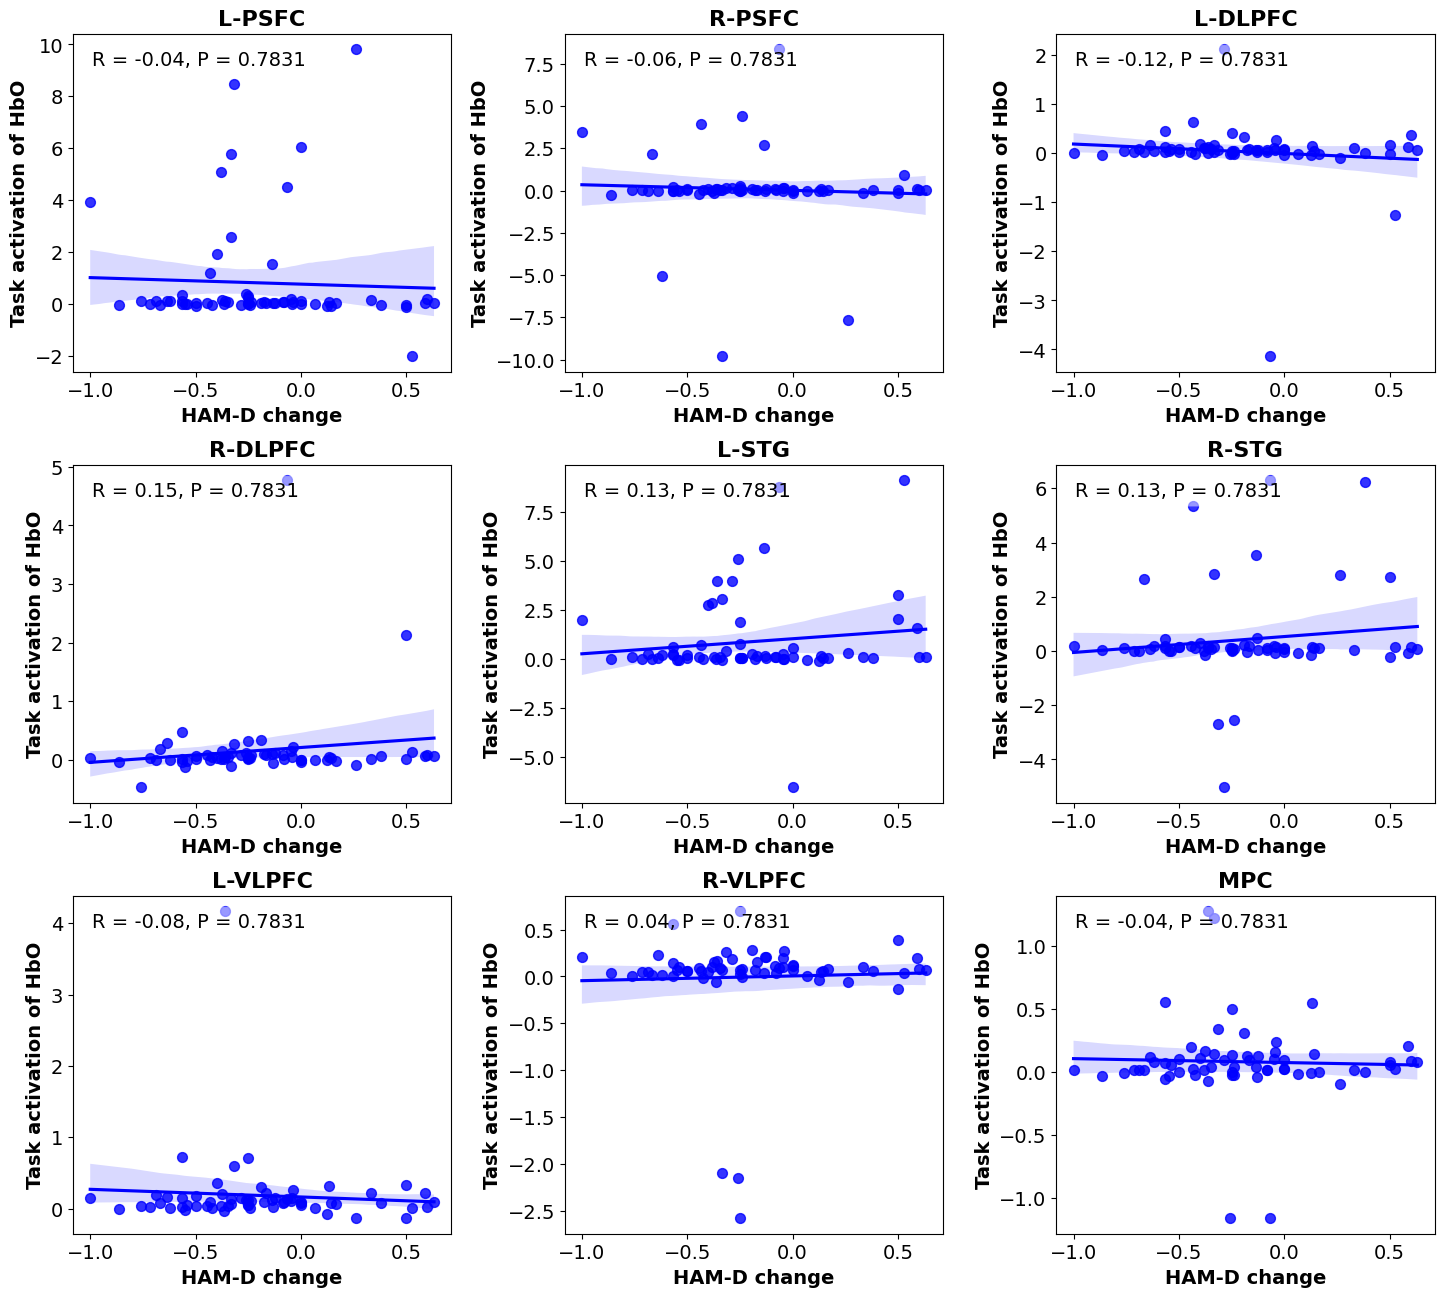

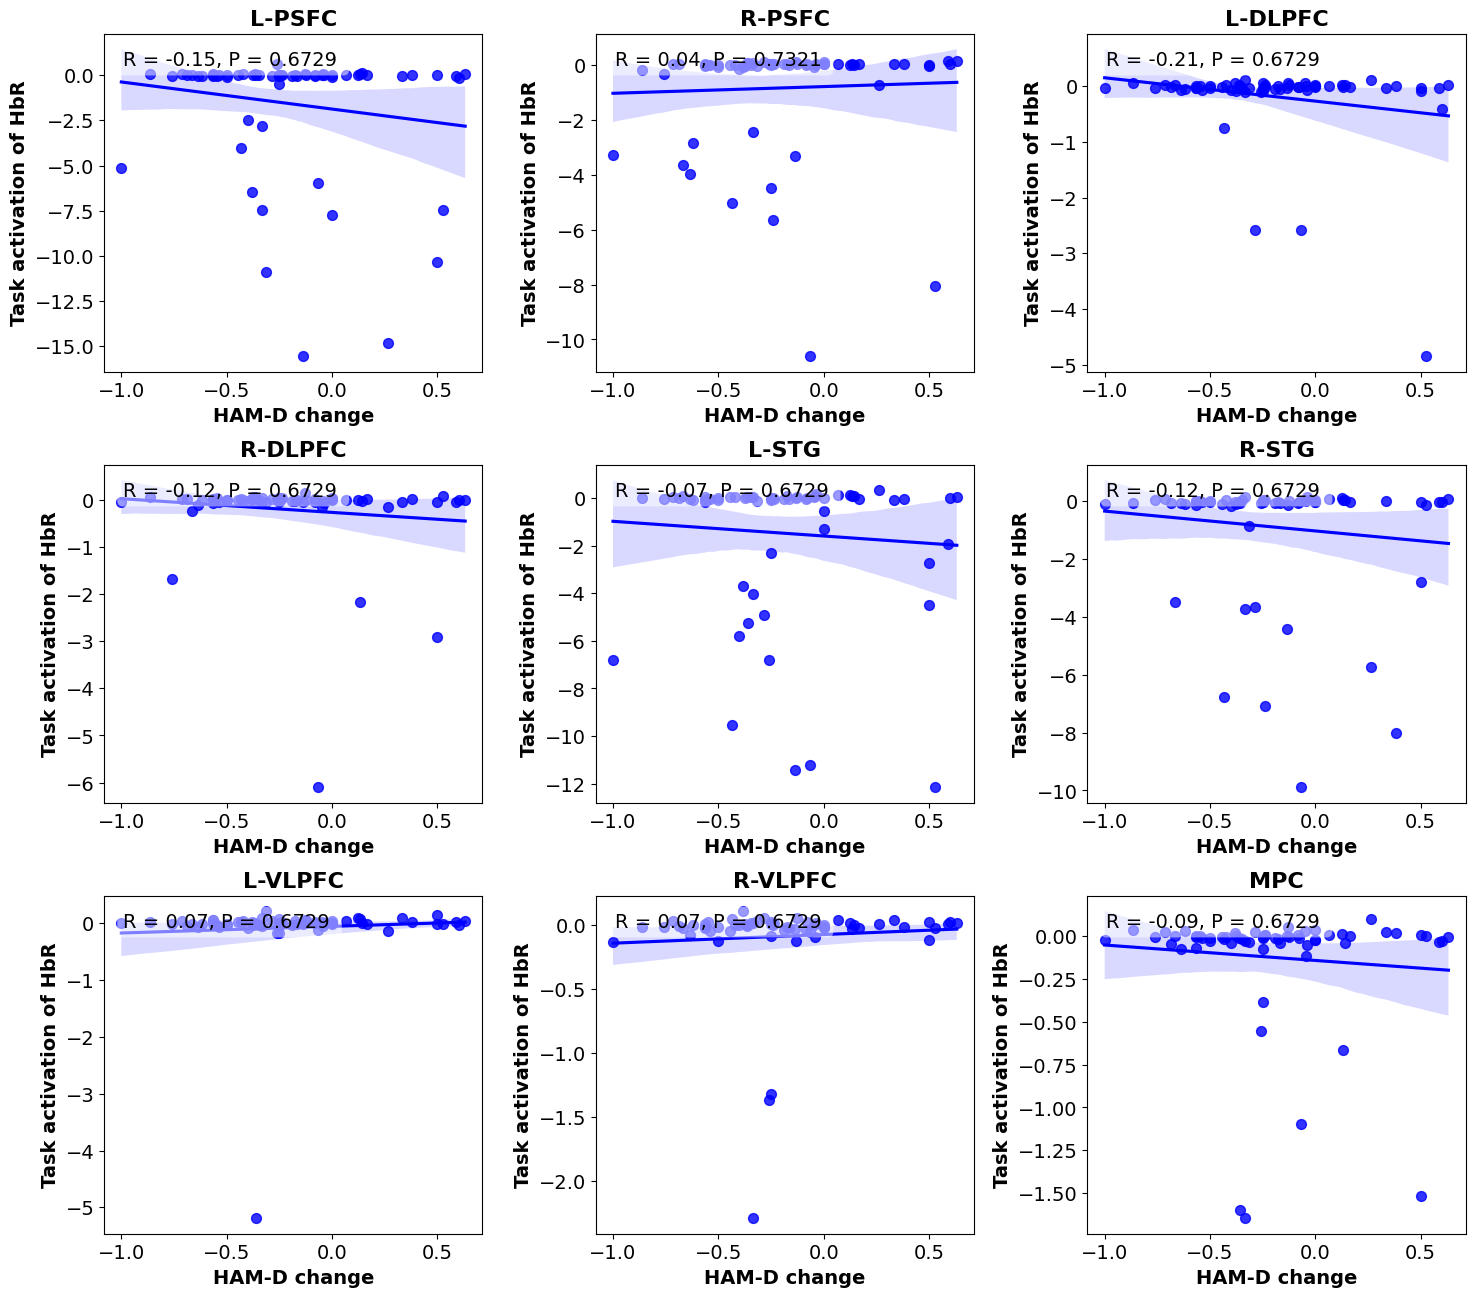

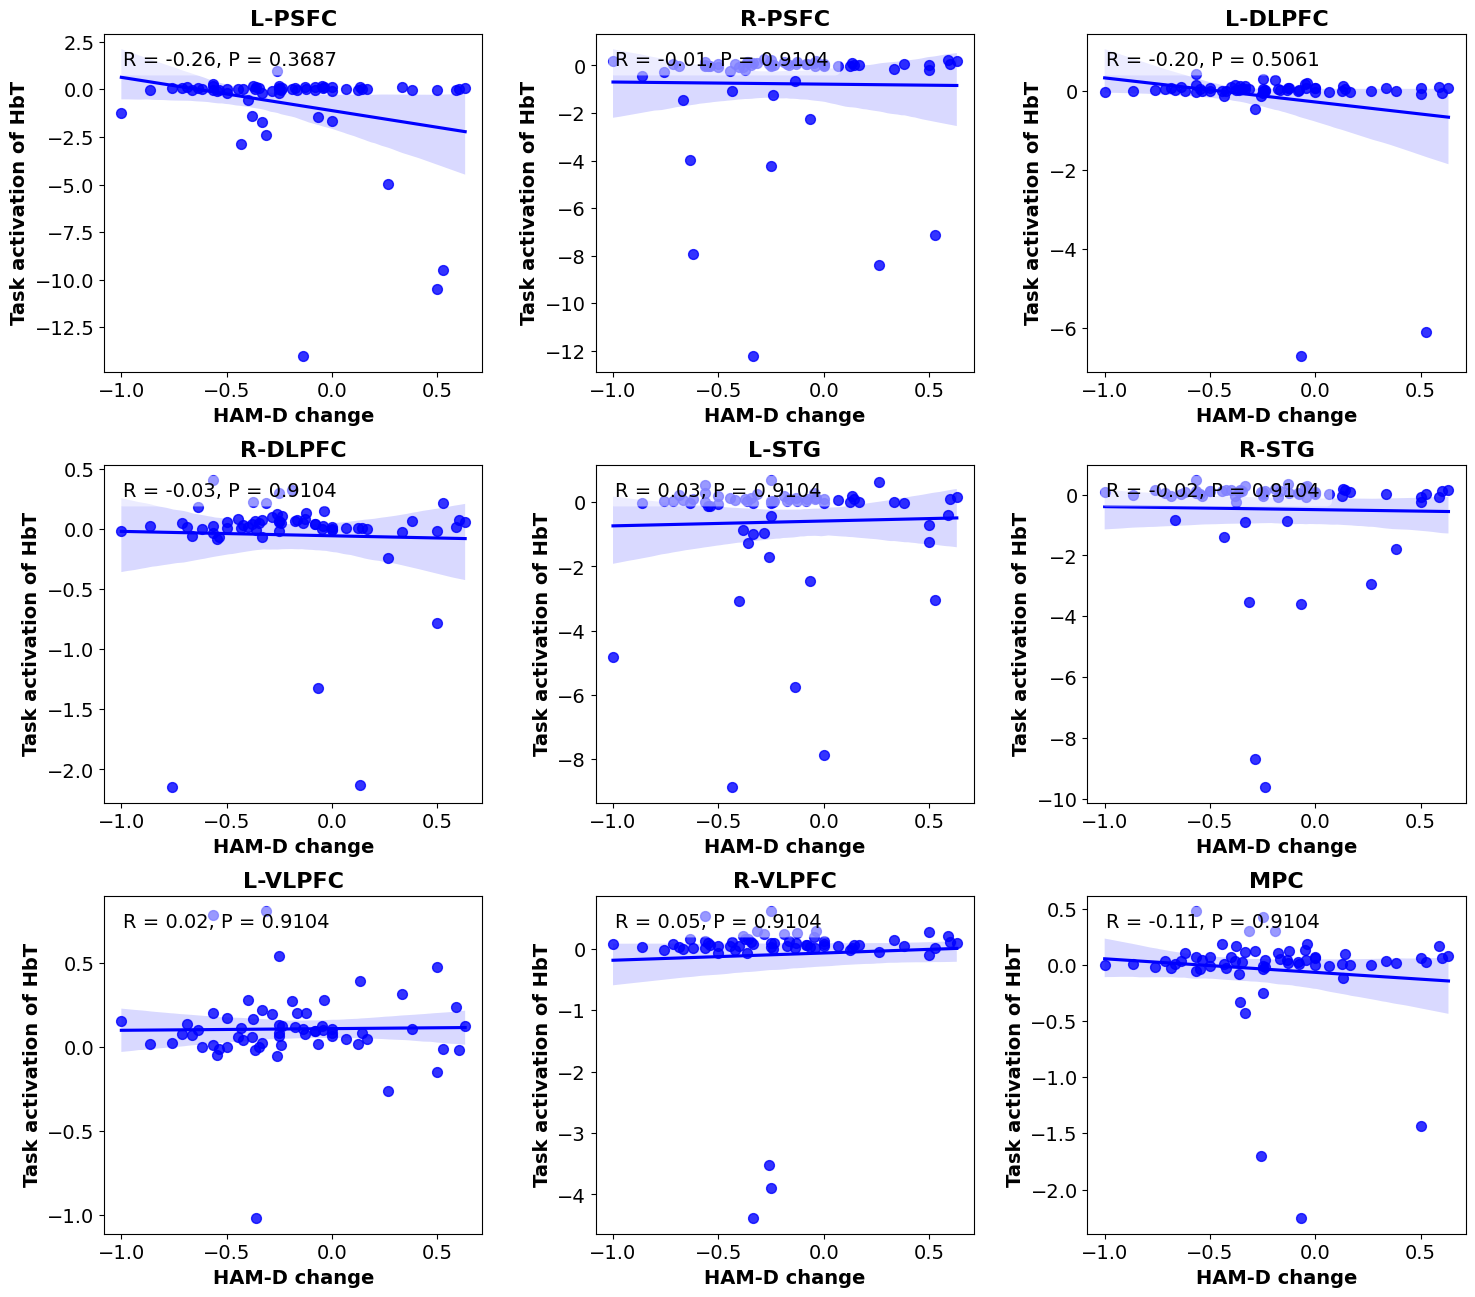

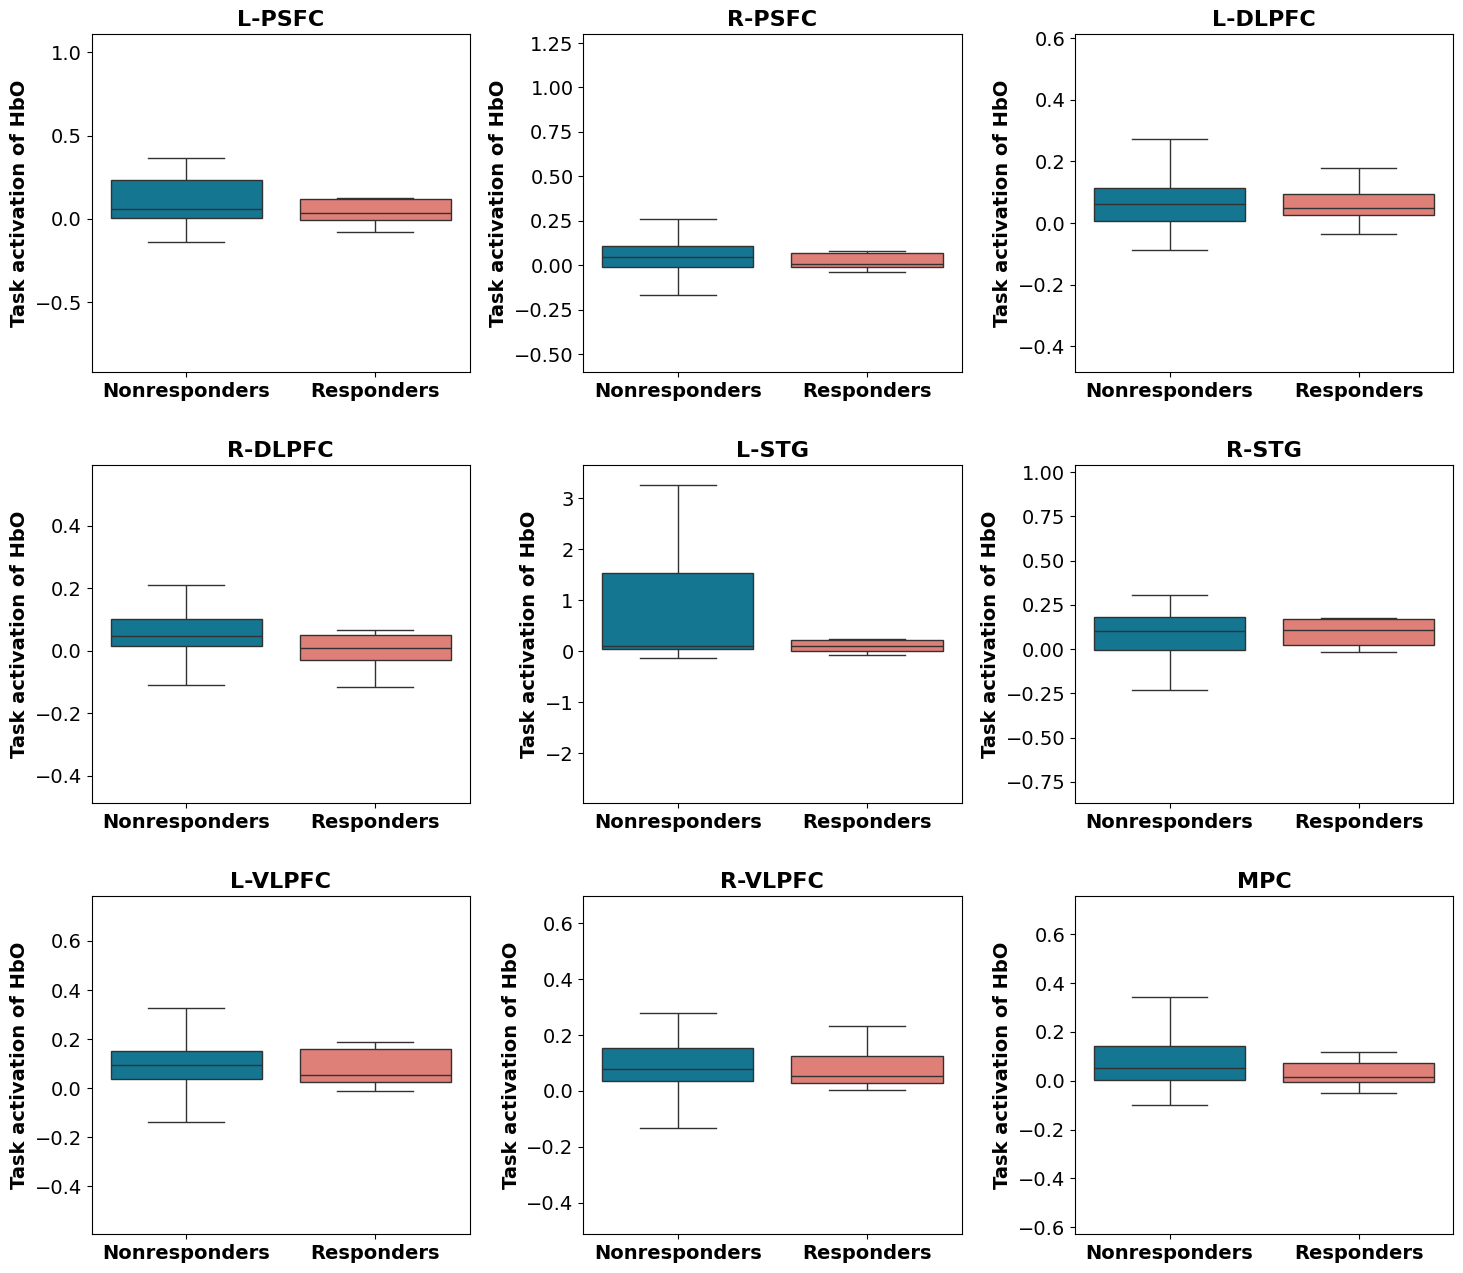

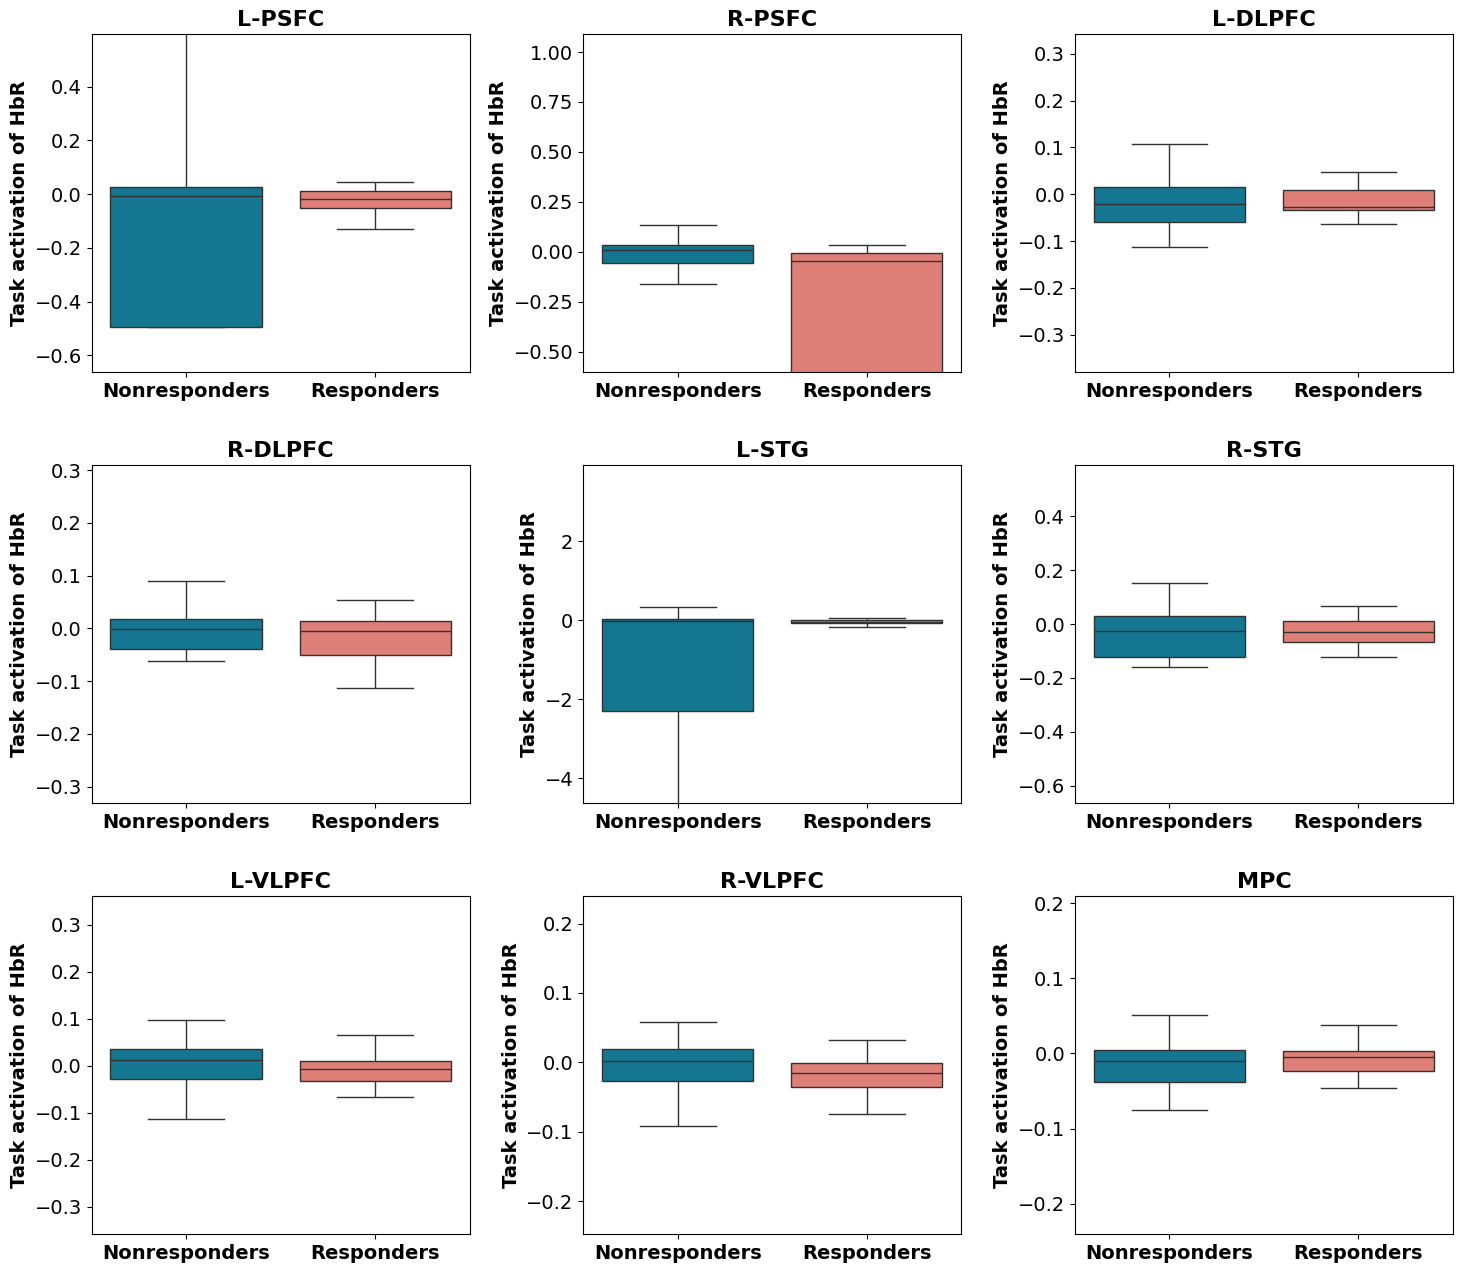

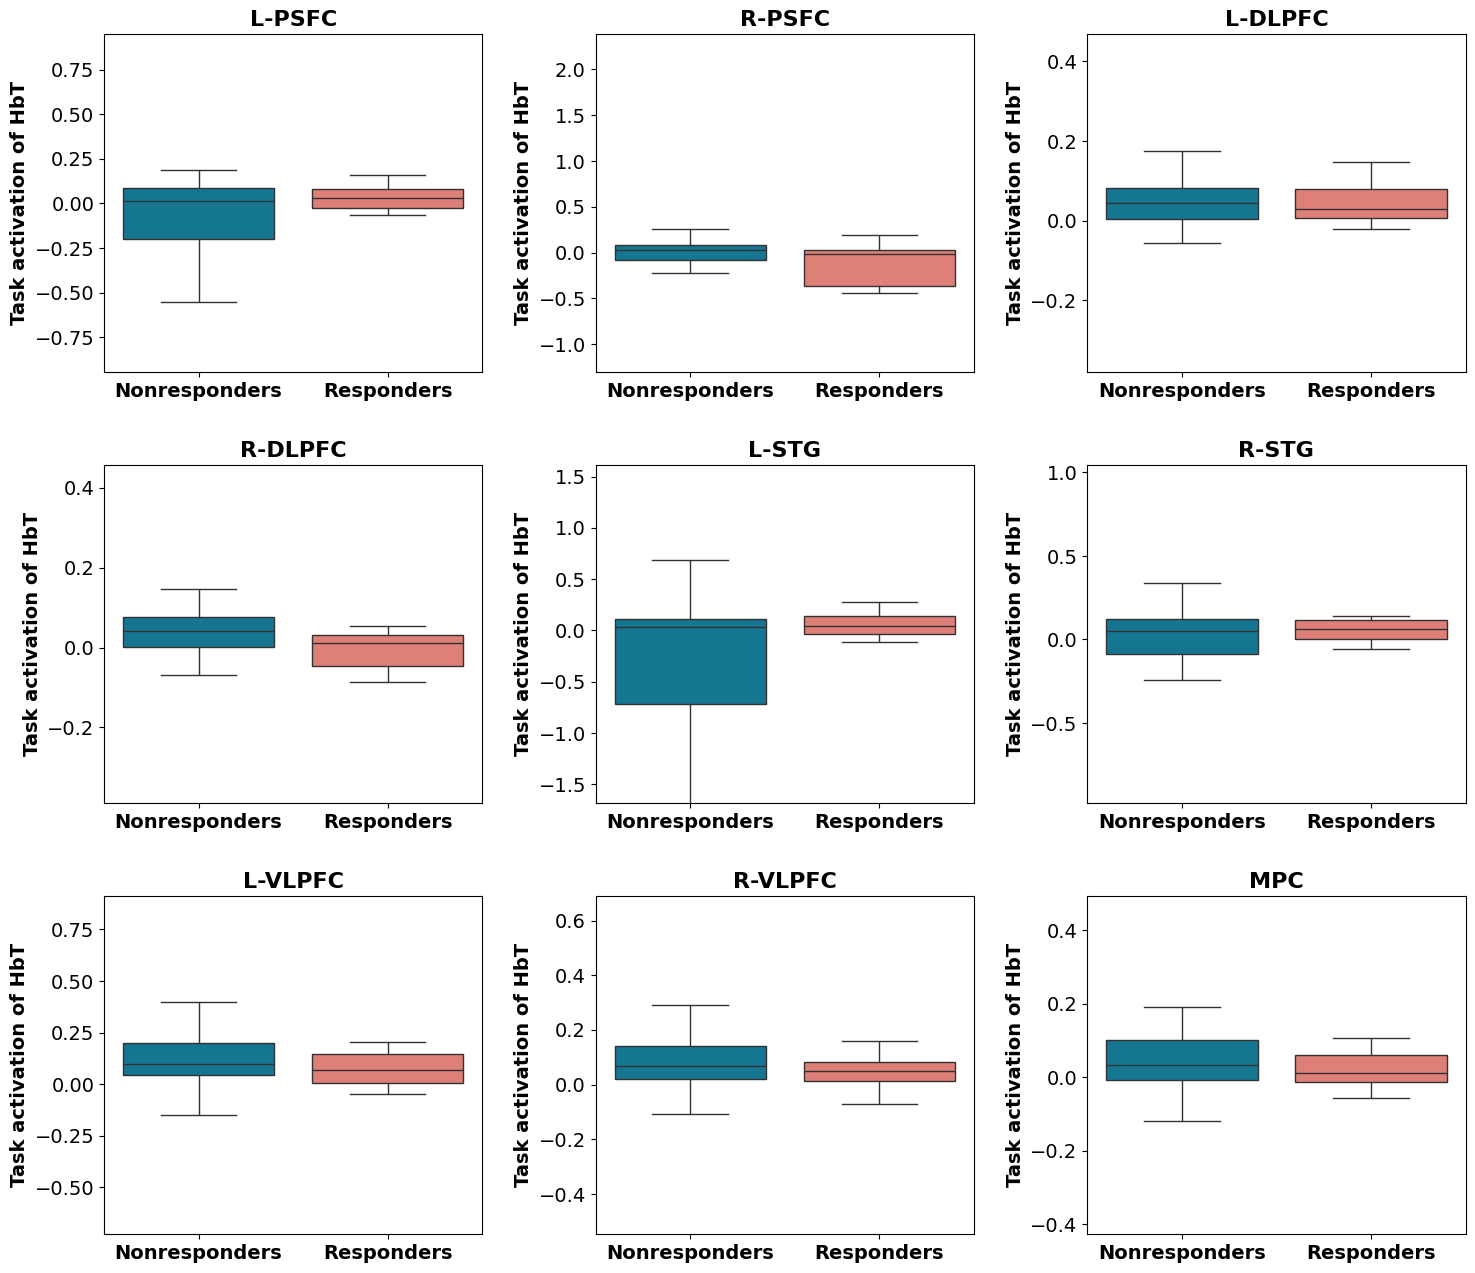

In [4]:


def set_xlabel_of_ax(ax, label_name, font_size):
    if label_name == 'HAMD_change':
        ax.set_xlabel('HAM-D change', fontsize=font_size, fontweight='bold')
        ax.set_xticks(np.arange(-1,1, 0.5))
        
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Nonresponders', 'Responders'], fontsize=font_size, fontweight='bold')
            
def get_five_regions_from_nine(data):
    res = np.zeros((data.shape[0], 5))
    res[:, 0] = (data[:, 0] + data[:, 1]) / 2
    res[:, 1] = (data[:, 2] + data[:, 3]) / 2
    res[:, 2] = (data[:, 4] + data[:, 5]) / 2
    res[:, 3] = (data[:, 6] + data[:, 7]) / 2
    res[:, 4] = data[:, 8]
    return res 
def add_asterisks(p_value):
    if p_value < 0.005:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return ""
def plot_correlation_ax(axs, label_val, task_change_hb, label_name, region_num):
    
    all_p_value = []
    all_R = []
    all_whisker_low_high = []
    for i in range(task_change_hb.shape[-1]):
        if region_num=='five_regions': 
            ax = axs[i]
        else:
            ax = axs[i // 3, i % 3]
        region_task_change = task_change_hb[:, i]
            
        if label_name == 'HAMD_change':
            # Calculate correlation coefficient and p-value
            stat, p_value = pearsonr(label_val, region_task_change)
            
            # Create a new figure
            sns.regplot(x=label_val, y=region_task_change, ax=ax, color='blue', scatter_kws={'s': 50}, line_kws={'color': 'blue'})


        else: 
            
            responders = region_task_change[label_val == 1]
            nonresponders = region_task_change[label_val == 0]
            
            stat, p_value = mannwhitneyu(responders, nonresponders)
            # 绘制boxplot
            sns.boxplot(data=[nonresponders, responders], ax=ax, palette=["#0081a7", "#f07167"],showfliers=False)

            # 绘制散点图
            # sns.stripplot(data=[nonresponders, responders], ax=ax, palette=["#4cc9f0", "#f72585"], jitter=0.1, size=5)
            data = np.concatenate([responders, nonresponders])
            q1, q3 = np.percentile(data, [25, 75])
            iqr = q3 - q1
            whisker_low = q1 - 5 * iqr
            whisker_high = q3 + 5 * iqr
            if region_num == 'nine_regions' and label_name == 'Responders' and i == 1:
                whisker_high += 5 * iqr

            # 设置ylim基于须的范围
            ax.set_ylim(whisker_low, whisker_high)
            all_whisker_low_high.append((whisker_low, whisker_high))
            
        all_p_value.append(p_value)
        all_R.append(stat)
        
        set_xlabel_of_ax(ax, label_name, font_size=14)
        ax.tick_params(axis='y', labelsize=14) 
        ax.tick_params(axis='x', labelsize=14) 
        
        # only set ylabel and title for the first ax
        if region_num=='five_regions':
            plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, hspace=0.275, wspace=0.2)
            if i == 0: 
                ax.set_ylabel(f"{feature_name} of {hb_type}", fontsize=14, fontweight='bold')
        else:
            plt.subplots_adjust(top=0.9, bottom=0.1, left=0.075, hspace=0.275, wspace=0.3)
            ax.set_ylabel(f"{feature_name} of {hb_type}", fontsize=14, fontweight='bold')
            
        ax.set_title(region_name[i], fontsize=16, fontweight='bold')    
    fdr_correct_all_p_value = multipletests(all_p_value, method='fdr_bh')[1]
    for i in range(task_change_hb.shape[-1]):
        if region_num=='five_regions': 
            ax = axs[i]
        else:
            ax = axs[i // 3, i % 3]
        p_value = fdr_correct_all_p_value[i]
        R = all_R[i]
        
        if label_name == 'HAMD_change':
            ax.text(0.05, 0.95, f'R = {R:.2f}, P = {p_value:.4f} ',
                transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5), fontsize=14)
        else:
            whisker_low, whisker_high = all_whisker_low_high[i]
            # 添加统计检验结果
                # Add statistical significance if p < 0.05
            if p_value < 0.05:
                # Determine the positions for the line and the asterisk
                max_val = whisker_high
                min_val = whisker_low
                mid_point = np.mean(ax.get_xticks())
                line_height = max_val *0.8

                # Draw a line and asterisk
                ax.plot([ax.get_xticks()[0], ax.get_xticks()[-1]], [line_height, line_height], color="black")
                ax.text(mid_point, line_height, add_asterisks(p_value), ha='center', va='bottom', color='black', fontsize=14)
                
    
    for i in fdr_correct_all_p_value:
        if i < 0.05:
            return True
    return False

                
                    
                    
                    
                    

task_end_index = 700
task_start_index = 100
# nine_region_name = ['L-PSFC', 'R-PSFC', 'L-DPC', 'R-DPC', 'L-STG', 'R-STG', 'L-VPC', 'R-VPC', 'MPC']
nine_region_name = ['L-PSFC', 'R-PSFC', 'L-DLPFC', 'R-DLPFC', 'L-STG', 'R-STG', 'L-VLPFC', 'R-VLPFC', 'MPC']

five_region_name = ['PSFC', 'DLPFC', 'STG', 'VLPFC', 'MPC']

dict_hb = {'HbO': HbO, 'HbR': HbR, 'HbT': HbT}

dict_label = {'HAMD_change': reduced_percentage, 'Responders': label}

dict_region = {'five_regions': five_region_name, 'nine_regions': nine_region_name}

feature_name_all = ['Task change', 'Mean', 'Task activation']

HB = HbT
hb_type = 'HbT'

region_num = 'nine_regions'

output_fold = 'FigureTable/regression'

res_of_dpc = []
res_of_dpc_name = []

res_of_psfc = []
res_of_psfc_name = []
for feature_name in feature_name_all: # Task change, Mean, Task activation
    for region_num, region_name in dict_region.items(): # five_regions, nine_regions
        for label_name, label_val in dict_label.items(): # HAMD_change, Responders
            for hb_type, HB in dict_hb.items(): # HbO, HbR, HbT
                task_change_hb = np.zeros((64, 1, 9))
                # HB = HB - HB[:, 0, :][:, np.newaxis, :] # to see the result of draging to zero in the beginning
                for i in range(task_change_hb.shape[-1]):
                    if feature_name == 'Task change': x = HB[:, task_end_index:, i].mean(axis=1) - HB[:, :task_start_index, i].mean(axis=1)
                    if feature_name == 'Mean': x = HB[:, :, i].mean(axis=1) 
                    if feature_name == 'Task activation': x = HB[:, task_start_index:task_end_index, i].mean(axis=1) - HB[:, :task_start_index, i].mean(axis=1) - HB[:, task_end_index:, i].mean(axis=1)
                    
                    x = x[:, np.newaxis]
                    task_change_hb[:, :, i] = x

                task_change_hb = task_change_hb.squeeze()

                    
                    
                if region_num=='five_regions': 
                    task_change_hb = get_five_regions_from_nine(task_change_hb)
                    fig, axs = plt.subplots(1, 5, figsize=(20, 6))
                else:
                    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
                
                if region_num == 'five_regions' and feature_name == 'Task change' and hb_type == 'HbT':
                    if label_name == 'HAMD_change':
                        res_of_dpc.append(task_change_hb[:, 1])
                        res_of_dpc_name.append(f'{feature_name}_{hb_type}_{region_num}_{label_name}')
                    if label_name == 'Responders':
                        res_of_psfc.append(task_change_hb[:, 0])
                        res_of_psfc_name.append(f'{feature_name}_{hb_type}_{region_num}_{label_name}')
                if region_num == 'nine_regions' and feature_name == 'Task change' and hb_type == 'HbT':

                    if label_name == 'HAMD_change':
                        res_of_dpc.append(task_change_hb[:, 2])                    
                        res_of_dpc.append(task_change_hb[:, 3])                    
                        res_of_dpc_name.append(f'{feature_name}_{hb_type}_{region_num}_{label_name}_left')
                        res_of_dpc_name.append(f'{feature_name}_{hb_type}_{region_num}_{label_name}_right')
                    if label_name == 'Responders':
                        res_of_psfc.append(task_change_hb[:, 0])                    
                        res_of_psfc.append(task_change_hb[:, 1])                    
                        res_of_psfc_name.append(f'{feature_name}_{hb_type}_{region_num}_{label_name}_left')
                        res_of_psfc_name.append(f'{feature_name}_{hb_type}_{region_num}_{label_name}_right')
                    
                fig.tight_layout()
                signifance_flag = plot_correlation_ax(axs, label_val, task_change_hb, label_name, region_num)
                # for i in range(task_change_hb.shape[-1]):
                #     if region_num=='five_regions': 
                #         ax = axs[i]
                #     else:
                #         ax = axs[i // 3, i % 3]
                #     region_task_change = task_change_hb[:, i]
                    
                    
                #     set_xlabel_of_ax(ax, label_name, font_size=14)
                #     ax.set_ylabel(f"{feature_name} of {hb_type}")
                #     ax.set_title(region_name[i])
            

                output_fold_final = output_fold + '/all/' + f'{label_name}/{region_num}' # _drag_to_zero_in_beginning
                if not os.path.exists(output_fold_final):
                        os.makedirs(output_fold_final)
                plt.savefig(output_fold_final + f'/{feature_name}_{hb_type}_{region_num}.png')
                print(f'output_fold_final {output_fold_final}' * 10)
                if signifance_flag:
                    output_fold_final = output_fold + '/significance/' + f'{label_name}/{region_num}' # _drag_to_zero_in_beginning
                    if not os.path.exists(output_fold_final):
                            os.makedirs(output_fold_final)
                    plt.savefig(output_fold_final + f'/{feature_name}_{hb_type}_{region_num}.png')


[ 0.01305828 -0.10836994  0.07532879  0.05666526 -0.00604438 -0.0461726
  0.32476225  0.09437061  0.01970354  0.09018152 -0.01046264  0.03941312
  0.04433579 -0.24253817  0.00115917 -0.06422469 -0.02456377  0.10802138
  0.04726619  0.09171739 -0.02393028 -0.04685528 -0.02808104 -0.04542839
 -0.0330426  -0.93806167  0.0314726   0.03520158  0.10319642  0.11971871
  0.0475414   0.02713317 -0.1388164  -0.02152629  0.07617101 -0.10096508
  0.06524031  0.23956056 -0.0048982  -0.21779137  0.04611412  0.01753705
 -0.00298665  0.09888204  0.05644705  0.03223851  0.02662384 -0.03315246
  0.06464821 -0.0256179   0.04527563 -0.00658284  0.17733025  0.01282888
  0.01429644  0.01567053  0.00368119  0.03598076  0.00616983  0.76802185
 -0.00592091  0.0197178   0.07530811 -0.07193558]
[-0.24       -0.33333333 -0.25925926 -0.25        0.58823529  0.5
  0.13333333  0.38095238 -0.13636364 -0.19047619 -0.28571429 -0.23809524
  0.52631579 -0.06666667 -0.56521739 -0.38095238  0.         -0.44444444
 -0.4    

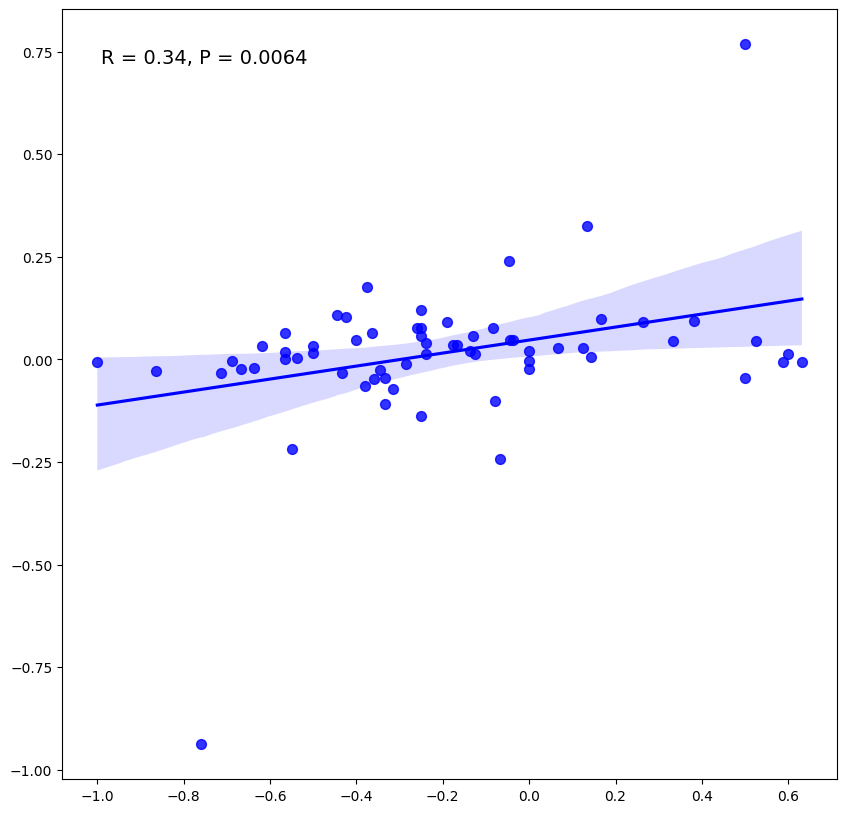

: 

In [46]:
def plot_correlation_ax(ax, label_val, region_task_change, label_name='HAMD_change'):
    
    if label_name == 'HAMD_change':
        # Calculate correlation coefficient and p-value
        correlation_coefficient, p_value = pearsonr(label_val, region_task_change)
        
        # Create a new figure
        sns.regplot(x=label_val, y=region_task_change, ax=ax, color='blue', scatter_kws={'s': 50}, line_kws={'color': 'blue'})
        
        ax.text(0.05, 0.95, f'R = {correlation_coefficient:.2f}, P = {p_value:.4f} ',
            transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5), fontsize=14)
    else: 
        
        responders = region_task_change[label_val == 1]
        nonresponders = region_task_change[label_val == 0]
        
        u_stat, p_value = mannwhitneyu(responders, nonresponders)
        
        # 绘制boxplot
        sns.boxplot(data=[responders, nonresponders], ax=ax, palette=["lightblue", "lightgreen"],showfliers=False)

        # 绘制散点图
        sns.stripplot(data=[responders, nonresponders], ax=ax, color='black', jitter=0.1, size=5)

        # 添加统计检验结果
        ax.text(0.05, 0.95, f'U = {u_stat:.2f}, P = {p_value:.4f}', 
                transform=ax.transAxes, verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5))
        # ax.set_ylim(-1,1)
        # ax.set_yticks(np.arange(-1,1.5, 0.5)) 
        # 计算IQR，并确定须的范围
        data = np.concatenate([responders, nonresponders])
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        whisker_low = q1 - 5 * iqr
        whisker_high = q3 + 5 * iqr
        # 设置ylim基于须的范围
        ax.set_ylim(whisker_low, whisker_high)
    return p_value

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
print(region_task_change)
print(label_val)
p_value = plot_correlation_ax(ax, label_val, region_task_change, label_name)

In [20]:

print(label_val.shape)
print(region_task_change.shape)

(100,)
(100,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


No handles with labels found to put in legend.


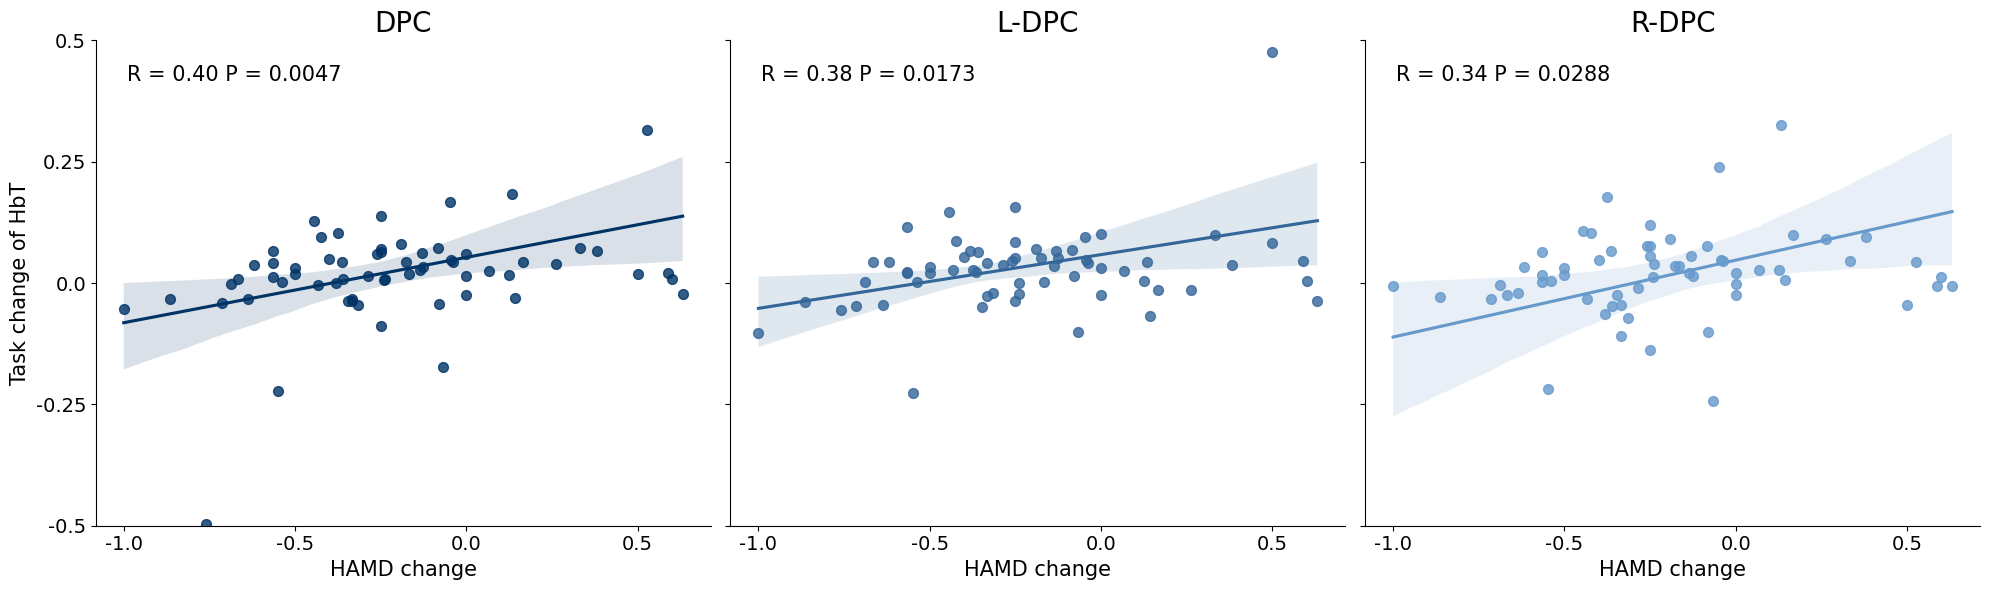

In [45]:

def set_xlabel_of_ax(ax, label_name, font_size):
    if label_name == 'HAMD_change':
        ax.set_xlabel('HAMD change', fontsize=font_size)
        ticks = np.arange(-1,1, 0.5)
        ax.set_xticks(ticks)
        ax.set_xticklabels([f"{tick}" for tick in ticks], fontsize=14)  # Setting font size here
        
        
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Nonresponders', 'Responders'], fontsize=font_size)
        
np_res_of_dpc = np.array(res_of_dpc)
num_fig = np_res_of_dpc.shape[0]
fig, axs = plt.subplots(1, num_fig, figsize=(20, 6))
label_name = 'HAMD_change'
color_dark_to_light = ['#003366', '#336699', '#6699CC']

# these three values are DPC, L-DPC, R-DPC
fdr_corrected_p_value = [0.0047, 0.0173, 0.0288]
            
for i in range(num_fig):
    ax = axs[i]
    region_task_change = np_res_of_dpc[i]
    label_val = reduced_percentage
    # Calculate correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(label_val, region_task_change)
    p_value = fdr_corrected_p_value[i]
    # Fit a line to the data
    fit_line = np.polyfit(label_val, region_task_change, 1)

    # Evaluate the fit line at each data point
    fit_line_values = np.polyval(fit_line, label_val)

    # Create a new figure
    sns.regplot(x=label_val, y=region_task_change, ax=ax, color=color_dark_to_light[i], scatter_kws={'s': 50}, line_kws={'color': color_dark_to_light[i]})
        # Annotation for statistical significance
    significance_text = 'Significant' if p_value < 0.05 else 'Not significant'
    ax.text(0.05, 0.95, f'R = {correlation_coefficient:.2f} P = {p_value:.4f} ',
            transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5), fontsize=15)

    # Showing only left and bottom spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    set_xlabel_of_ax(ax, label_name, font_size=15)
    ax.set_ylim(-0.5, 0.5)
    ticks = np.arange(-0.5, 0.6, 0.25)
    ax.set_yticks(ticks)
    if i == 0:
        ax.set_ylabel(f"Task change of {hb_type}", fontsize=15)
        ax.set_yticklabels([f"{tick}" for tick in ticks], fontsize=14)  # Setting font size here
    else:
        ax.set_yticklabels([])
    ax.set_title(['DPC', 'L-DPC', 'R-DPC'][i], fontsize=20)


    ax.legend(frameon=False, fontsize=14)
    

    # Show the plot
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


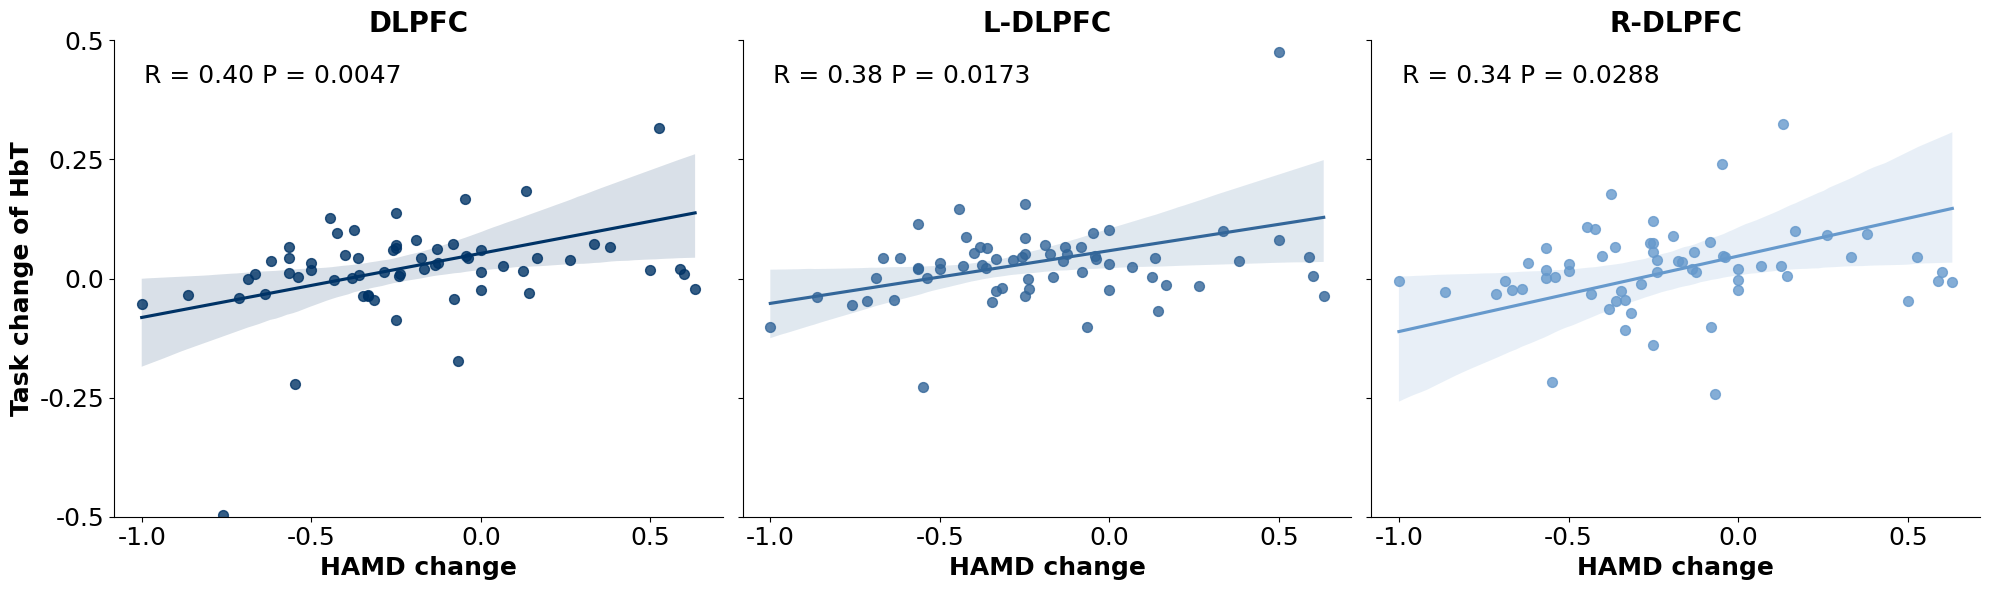

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

def set_xlabel_of_ax(ax, label_name, font_size):
    if label_name == 'HAMD_change':
        ax.set_xlabel('HAMD change', fontsize=font_size, fontweight='bold')
        ticks = np.arange(-1, 1, 0.5)
        ax.set_xticks(ticks)
        ax.set_xticklabels([f"{tick}" for tick in ticks], fontsize=font_size)
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Nonresponders', 'Responders'], fontsize=font_size)

# Example data
np_res_of_dpc = np.array(res_of_dpc)  # Assuming res_of_dpc is defined elsewhere
num_fig = np_res_of_dpc.shape[0]
fig, axs = plt.subplots(1, num_fig, figsize=(20, 6))
label_name = 'HAMD_change'
color_dark_to_light = ['#003366', '#336699', '#6699CC']
fdr_corrected_p_value = [0.0047, 0.0173, 0.0288]
hb_type = "HbT"  # Define hb_type as appropriate
font_size = 18  # New variable for font size

for i in range(num_fig):
    ax = axs[i]
    region_task_change = np_res_of_dpc[i]
    label_val = reduced_percentage
    
    # Calculate correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(label_val, region_task_change)
    p_value = fdr_corrected_p_value[i]
    
    # Fit a line to the data
    fit_line = np.polyfit(label_val, region_task_change, 1)
    fit_line_values = np.polyval(fit_line, label_val)
    
    # Create the plot
    sns.regplot(x=label_val, y=region_task_change, ax=ax, color=color_dark_to_light[i], 
                scatter_kws={'s': 50}, line_kws={'color': color_dark_to_light[i]})
    
    # Annotation for statistical significance
    ax.text(0.05, 0.95, f'R = {correlation_coefficient:.2f} P = {p_value:.4f}', 
            transform=ax.transAxes, verticalalignment='top', 
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5), fontsize=font_size)
    
    # Showing only left and bottom spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    set_xlabel_of_ax(ax, label_name, font_size=font_size)
    ax.set_ylim(-0.5, 0.5)
    ticks = np.arange(-0.5, 0.6, 0.25)
    ax.set_yticks(ticks)
    
    if i == 0:
        ax.set_ylabel(f"Task change of {hb_type}", fontsize=font_size, fontweight='bold')
        ax.set_yticklabels([f"{tick}" for tick in ticks], fontsize=font_size)
    else:
        ax.set_yticklabels([])
    
    ax.set_title(['DLPFC', 'L-DLPFC', 'R-DLPFC'][i], fontsize=font_size+2, fontweight='bold')
    ax.legend(frameon=False, fontsize=font_size-3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(3, 64)


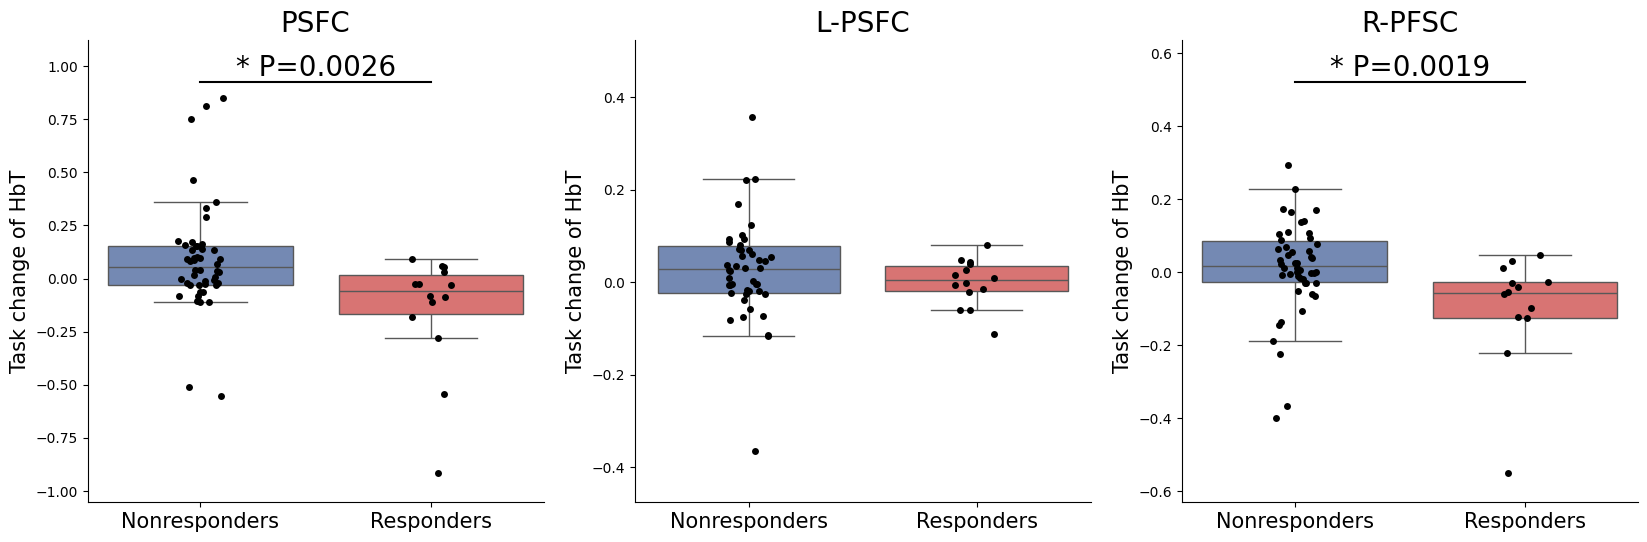

In [123]:
np_res_of_psfc = np.array(res_of_psfc)
print(np_res_of_psfc.shape)
num_fig = np_res_of_psfc.shape[0]
fig, axs = plt.subplots(1, num_fig, figsize=(20, 6))
label_name = 'Responders'
color_dark_to_light = ['#003366', '#336699', '#6699CC']


            
for i in range(num_fig):
    ax = axs[i]
    region_task_change = np_res_of_psfc[i]
    label_val = label
    # Calculate correlation coefficient and p-value
    responders = region_task_change[label_val == 1]
    nonresponders = region_task_change[label_val == 0]
    
    u_stat, p_value = mannwhitneyu(responders, nonresponders)
    
    # 绘制boxplot
    sns.boxplot(data=[nonresponders, responders], ax=ax, palette=["#6986be", "#e96362"],showfliers=False)

    # 绘制散点图
    sns.stripplot(data=[nonresponders, responders], ax=ax, color='black', jitter=0.1, size=5)

    # 添加统计检验结果

    # ax.set_ylim(-1,1)
    # ax.set_yticks(np.arange(-1,1.5, 0.5)) 
    # 计算IQR，并确定须的范围
    data = np.concatenate([responders, nonresponders])
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    whisker_low = q1 - 5 * iqr
    whisker_high = q3 + 5 * iqr
    # 设置ylim基于须的范围
    ax.set_ylim(whisker_low, whisker_high)
    
        # Add statistical significance if p < 0.05
    if p_value < 0.05:
        # Determine the positions for the line and the asterisk
        max_val = whisker_high
        min_val = whisker_low
        mid_point = np.mean(ax.get_xticks())
        line_height = max_val - 1*iqr #+ (max_val - min_val) * 0.1  # slightly above the max

        # Draw a line and asterisk
        ax.plot([ax.get_xticks()[0], ax.get_xticks()[-1]], [line_height, line_height], color="black")
        ax.text(mid_point, line_height, f'* P={p_value:.4f}', ha='center', va='bottom', color='black', fontsize=20)
        
        
    # Showing only left and bottom spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    set_xlabel_of_ax(ax, label_name, font_size=15)

    ax.set_ylabel(f"Task change of {hb_type}", fontsize=15)
    ax.set_title(['PSFC', 'L-PSFC', 'R-PFSC'][i], fontsize=20)
    # if ax == axs[0]:
    #     ax.set_ylim(-1, 1)
    #     ax.set_yticks(np.arange(-1, 1.5, 0.5))
    # else:
    #     ax.set_ylim(-0.5, 0.5)
    #     ax.set_yticks(np.arange(-0.5, 0.6, 0.25))
    ax.legend(frameon=False, fontsize=14)
    

    # Show the plot
plt.show()
